# Plotting all results of sensitivity analysis
This notebook:

* plots each sensitivitiy/stability test effect on cm using cm traces from text files

In [117]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import scipy
import copy

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from epimodel.pymc3_models.utils import geom_convolution
from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor
import sensitivityplotlib as spl

sns.set_style("ticks")
%matplotlib inline

params to set for all plots

In [268]:
out_dir = 'out_growth_3'
model_types = ['combined_v3']#['combined', 'active', 'death']#,'combined_v3']

In [269]:
def color_palette_sensitivity(num_colors, index_default, model_type):
    if model_type=='combined':
        color_base = "tab:purple"
    if model_type=='active':
        color_base ="tab:blue"
    if model_type=='death':
        color_base ="tab:red"
    if model_type=='combined_v3':
        color_base = "tab:purple"
    colors = sns.light_palette(color_base,n_colors=num_colors)
    colors.pop(0)
    colors.insert(index_default,[0,0,0]) 
    return colors

## CM Leavouts

In [270]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("../final_data/data_final.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


In [271]:
cm_leavouts = copy.deepcopy(data.CMs)
cm_leavouts.append('None')

In [272]:
colors = sns.color_palette("hls",10)
colors[-1] = [0,0,0]
cm_labels = data.CMs
legend_title='NPI Left Out'
legend_labels = cm_leavouts
legend_fontsize=4.5

##### CM leavouts, hierarchical CMs

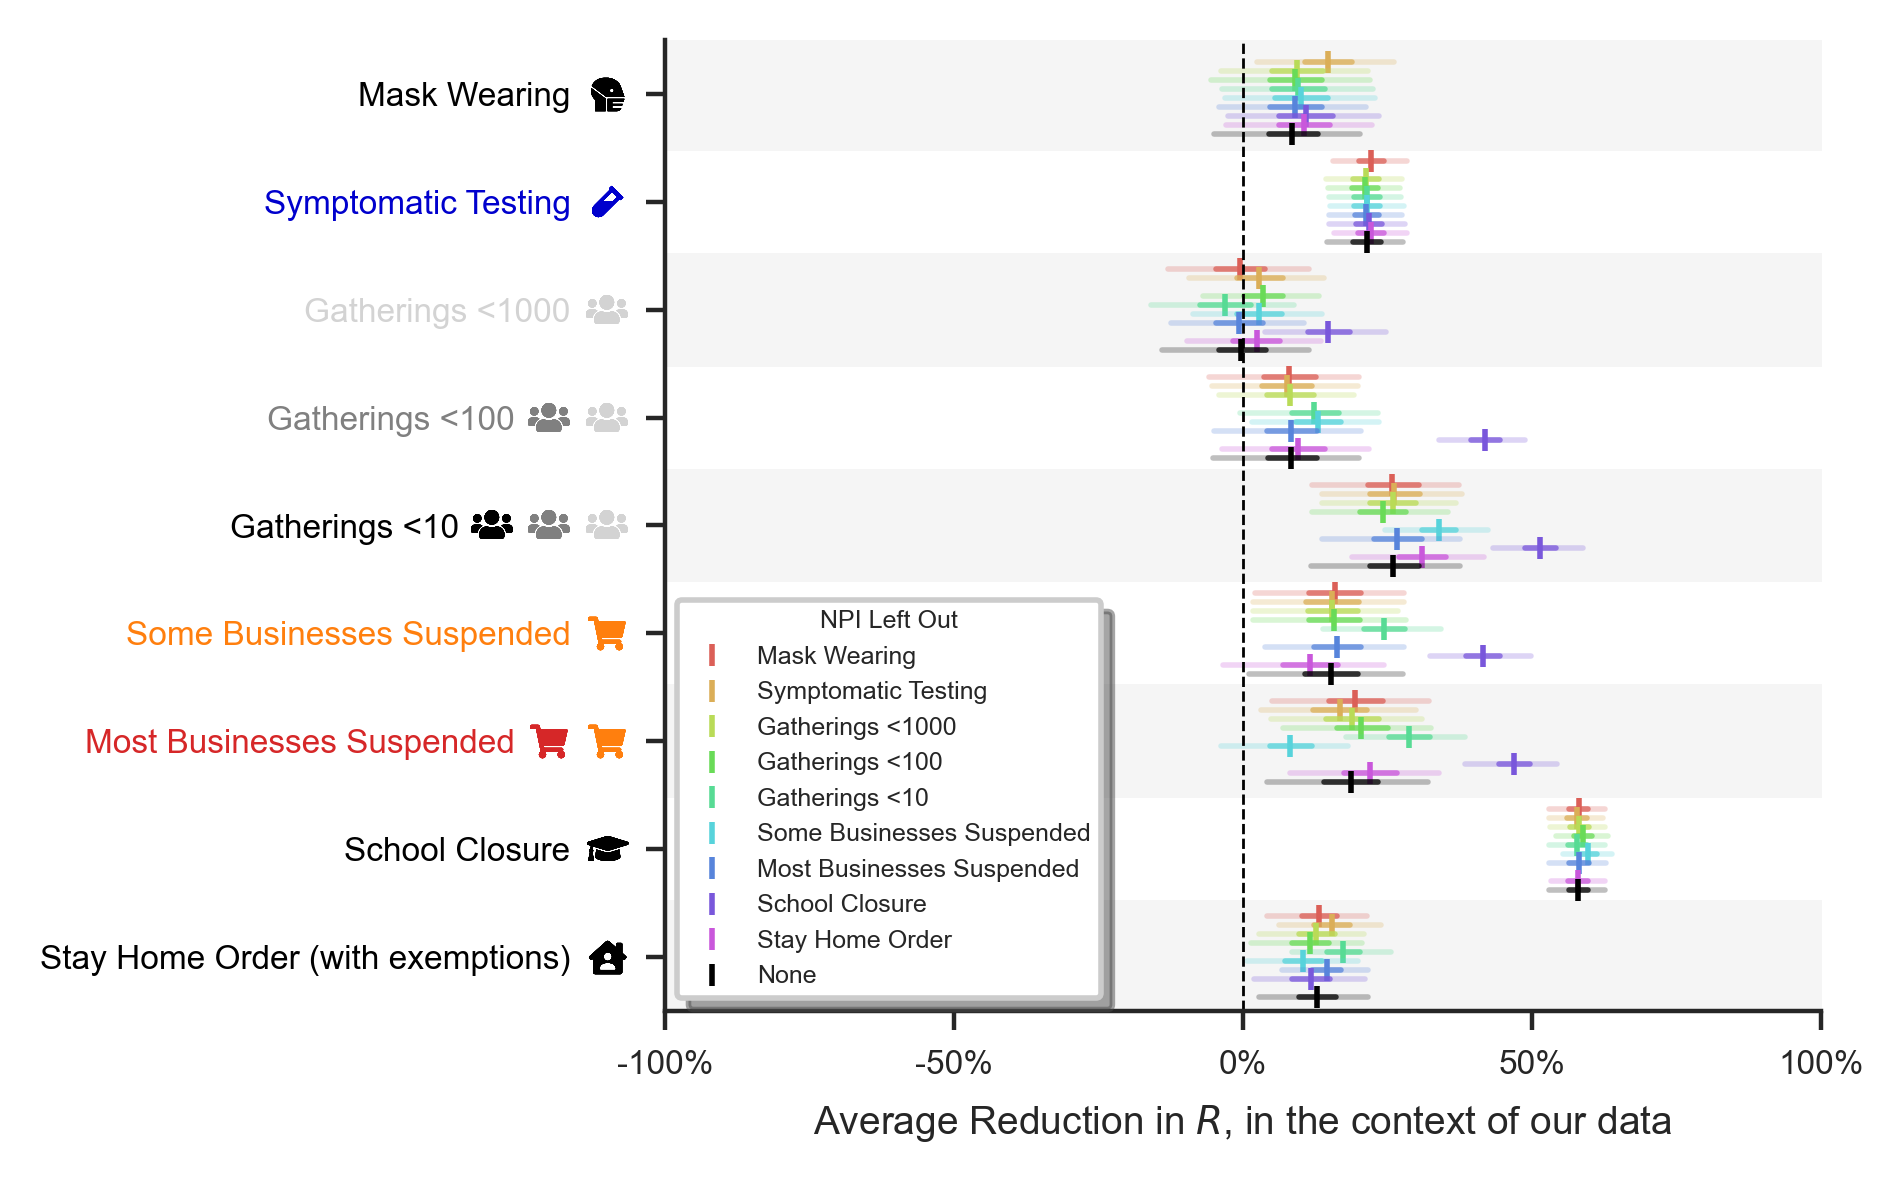

In [273]:
for model_type in model_types:
    filenames = [f'%s/cm_leavout_%s_{i}.txt'%(out_dir, model_type) for i in range(len(cm_leavouts))]

    spl.plot_cm_effect_sensitivity_v2(filenames, cm_labels, legend_labels,
                                   legend_title=legend_title,
                                   legend_fontsize=legend_fontsize,
                                   colors=colors,
                                   leavouts=True)
    plt.savefig( out_dir + '/cm_leavout_sensitivity_' + model_type + '_combos.pdf')

##### CM leavouts, uncombined CMs

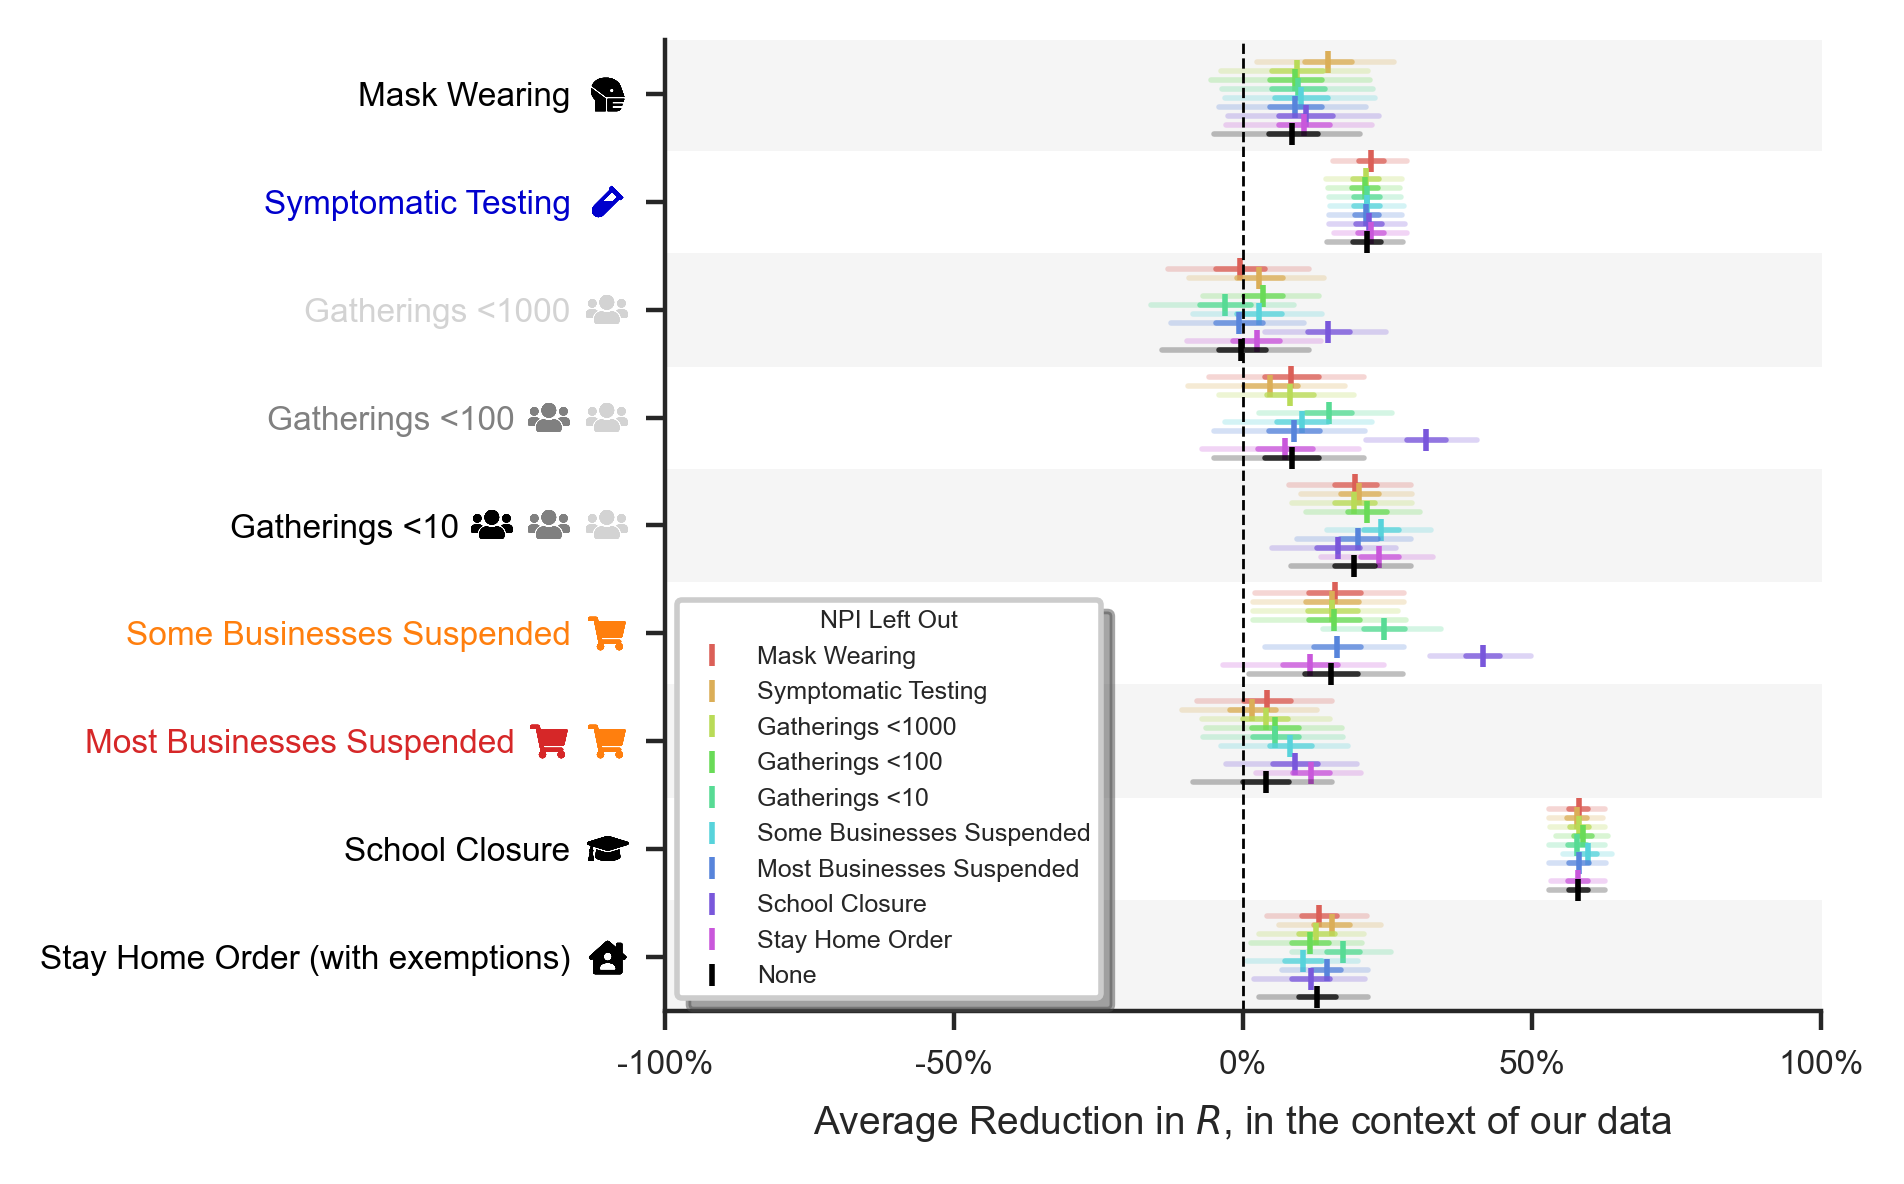

In [274]:
for model_type in model_types:
    filenames = [f'%s/cm_leavout_%s_{i}.txt'%(out_dir, model_type)   for i in range(len(cm_leavouts))]

    spl.plot_cm_effect_sensitivity_v2(filenames, cm_labels, legend_labels,
                                   legend_title=legend_title,
                                   legend_fontsize=legend_fontsize,
                                   colors=colors,
                                   leavouts=True,
                                   combine_hierarchical=False)
    plt.savefig( out_dir + '/cm_leavout_sensitivity_' + model_type + '.pdf')

## CM priors

In [226]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("../final_data/data_final.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


In [227]:
priors = ['half_normal', 'wide'] 
sigma_wide=10
legend_title = r'$\alpha$ Prior'
legend_labels = [r'Normal, $\sigma$ = 0.2', 'Normal, $\sigma$ = 10','Half Normal, $\sigma$ = 0.2']
cm_labels = data.CMs 
legend_fontsize=5
index_default=0

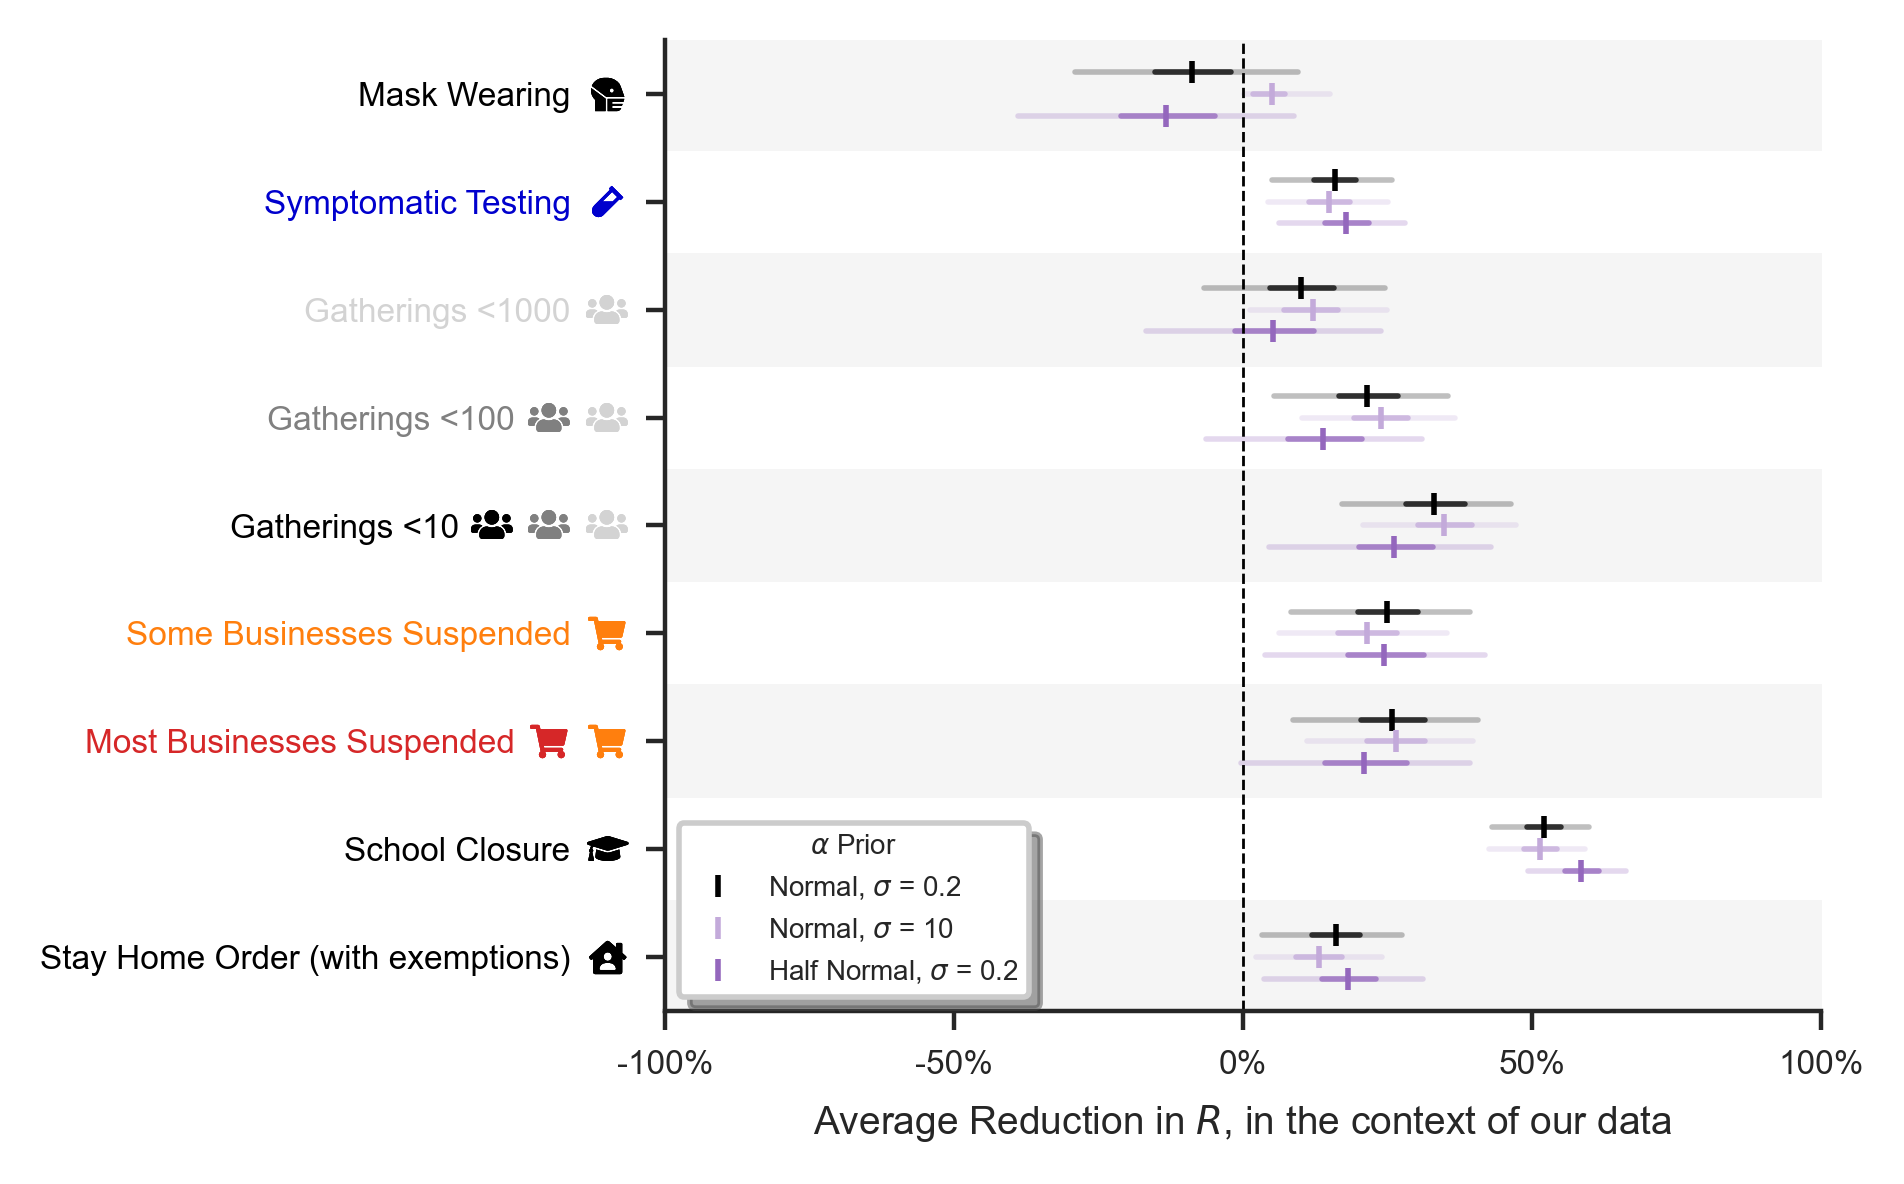

In [228]:
for model_type in model_types:
    filenames = [f'%s/cm_prior_%s_{prior}.txt'%(out_dir, model_type) for prior in priors]
    filenames.insert(index_default, out_dir +'/default_'+ model_type + '.txt')
    colors = color_palette_sensitivity(len(legend_labels), index_default, model_type)

    spl.plot_cm_effect_sensitivity_v2(filenames, cm_labels, legend_labels,
                                   legend_title=legend_title,
                                   colors = colors,
                                   legend_fontsize=legend_fontsize)
    plt.savefig( out_dir + '/cm_prior_sensitivity_' + model_type + '.pdf')

## Deaths and Confirmation Noise sensitivity

In [229]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("../final_data/data_final.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


In [230]:
conf_noise = [15,30] 
deaths_noise = [15,30]
legend_fontsize=5.5
legend_title='Output Noise'
index_default=0
cm_labels = data.CMs

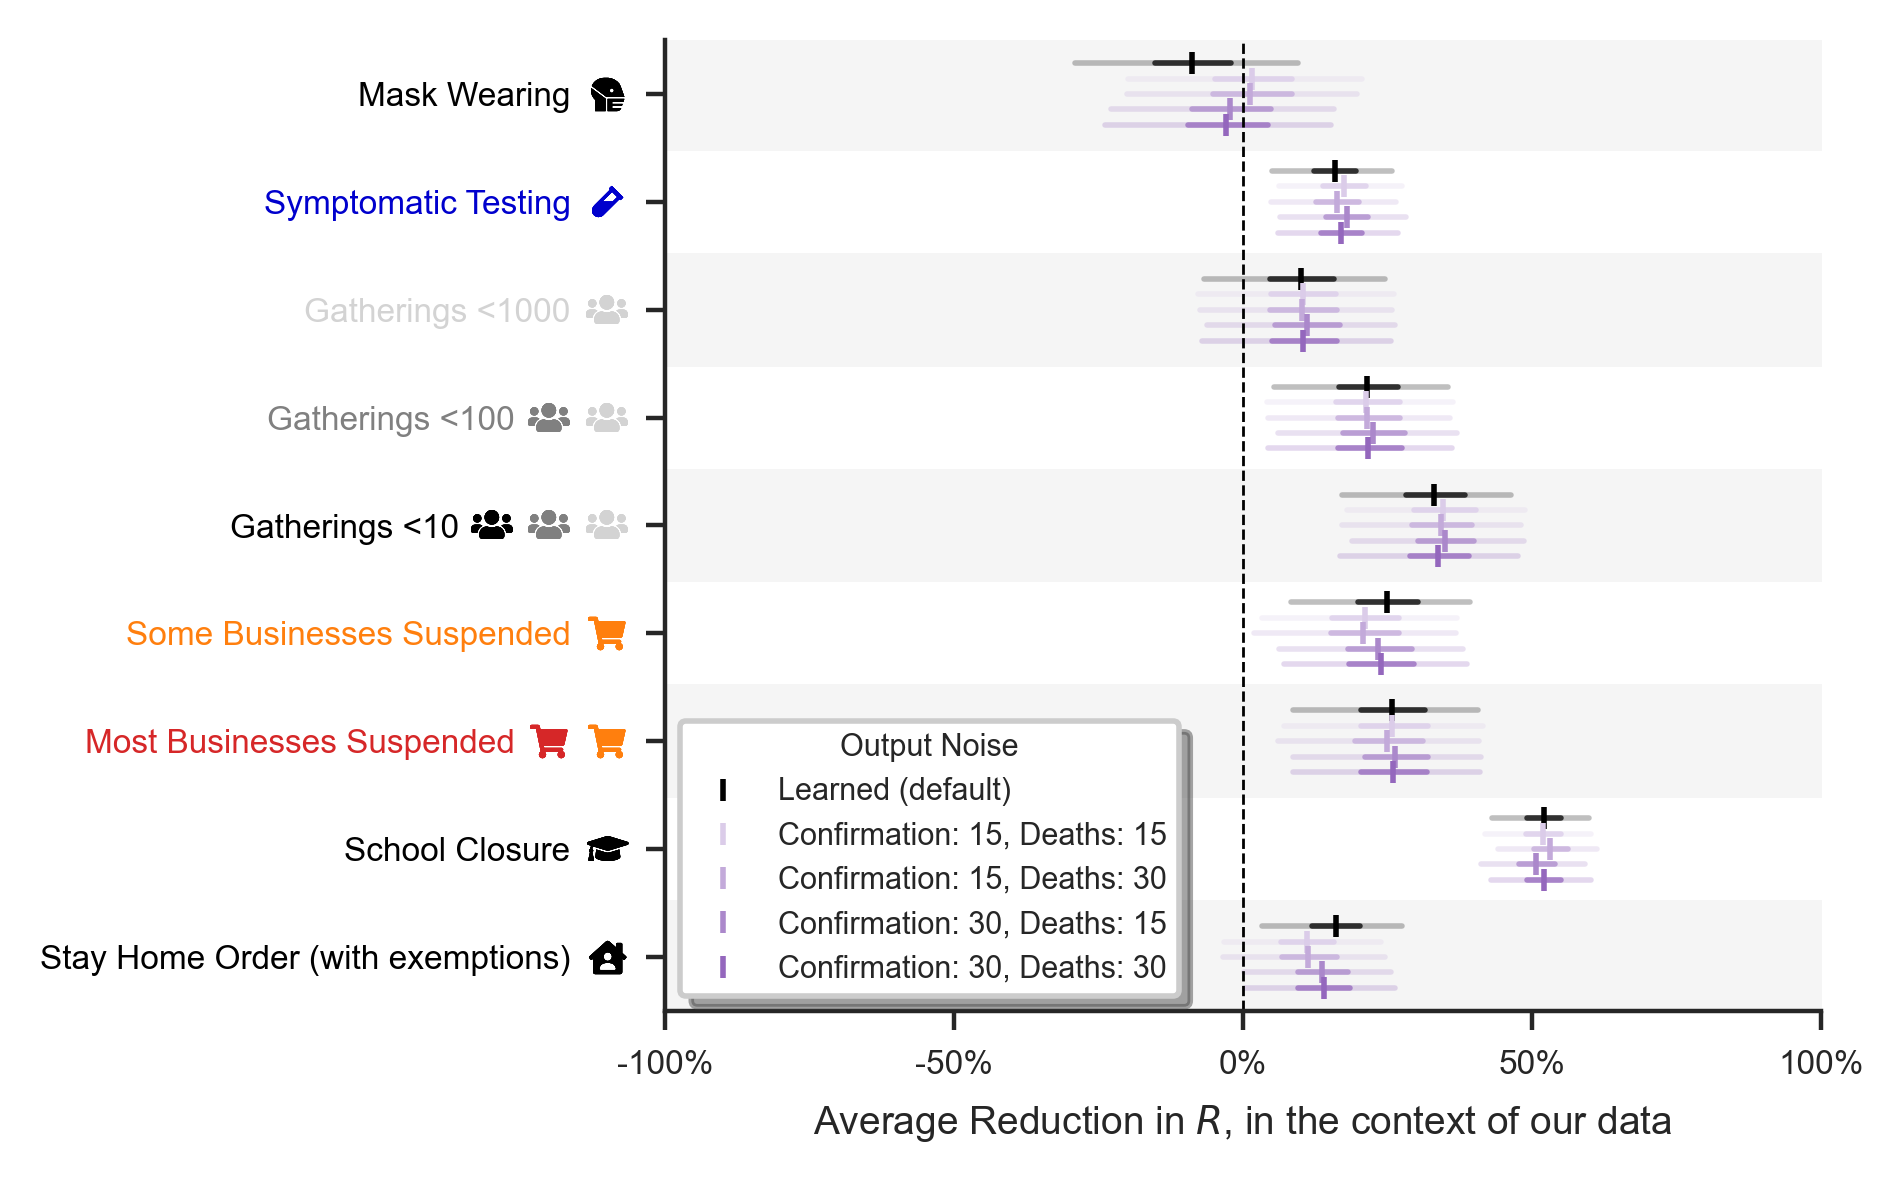

In [231]:
for model_type in model_types:
    filenames = [f'%s/noise_conf%d_deaths%d_%s.txt'%(out_dir, cn, dn, model_type) for cn in conf_noise for dn in deaths_noise]
    legend_labels = [f'Confirmation: %d, Deaths: %d'%(cn, dn) for cn in conf_noise for dn in deaths_noise]

    filenames.insert(index_default, out_dir +'/default_'+ model_type + '.txt')
    legend_labels.insert(index_default, 'Learned (default)')
    
    colors = color_palette_sensitivity(len(legend_labels), index_default, model_type)

    spl.plot_cm_effect_sensitivity_v2(filenames, cm_labels, legend_labels,
                                   legend_fontsize=legend_fontsize,
                                   legend_title=legend_title,
                                   colors=colors)
    plt.savefig( out_dir + '/conf_noise_sensitivity_' + model_type + '.pdf')

## Daily Growth Noise sensitivity

In [192]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("../final_data/data_final.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


In [193]:
daily_growth_noise = [0.05, 0.1, 0.4]# 0.2 is the default value
cm_labels = data.CMs
legend_labels = copy.deepcopy(daily_growth_noise)
index_default = 1
legend_labels.insert(index_default, '0.2 (default)')
legend_fontsize=6
legend_title='Daily Growth Noise'

In [194]:
for model_type in model_types:
    colors = color_palette_sensitivity(len(legend_labels), index_default, model_type)

    filenames = [f'%s/growth_noise_%s_{i}.txt'%(out_dir, model_type) for i in range(len(daily_growth_noise))]
    filenames.insert(index_default, out_dir + '/default_' + model_type + '.txt')
    spl.plot_cm_effect_sensitivity_v2(filenames, cm_labels, legend_labels, 
                               colors=colors, 
                               legend_title=legend_title,
                               legend_fontsize=legend_fontsize)
    plt.savefig(out_dir + '/daily_growth_noise_sensitivity_' + model_type + '.pdf')

OSError: out_growth_5/growth_noise_combined_v3_0.txt not found.

<Figure size 1920x1200 with 0 Axes>

## Mobility data sensitivity

In [232]:
dp = DataPreprocessor(drop_HS=True)
data_mob_no_work = dp.preprocess_data("../final_data/data_mob_no_work.csv")
data_mob = dp.preprocess_data("../final_data/data_mob.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc

In [233]:
data_mobility_types = ['no_work', 'rec_work']
legend_labels = ['Default', 'Mobility Data Added']
legend_fontsize=6
legend_fontsize=5
index_default = 0

##### including both mobility types

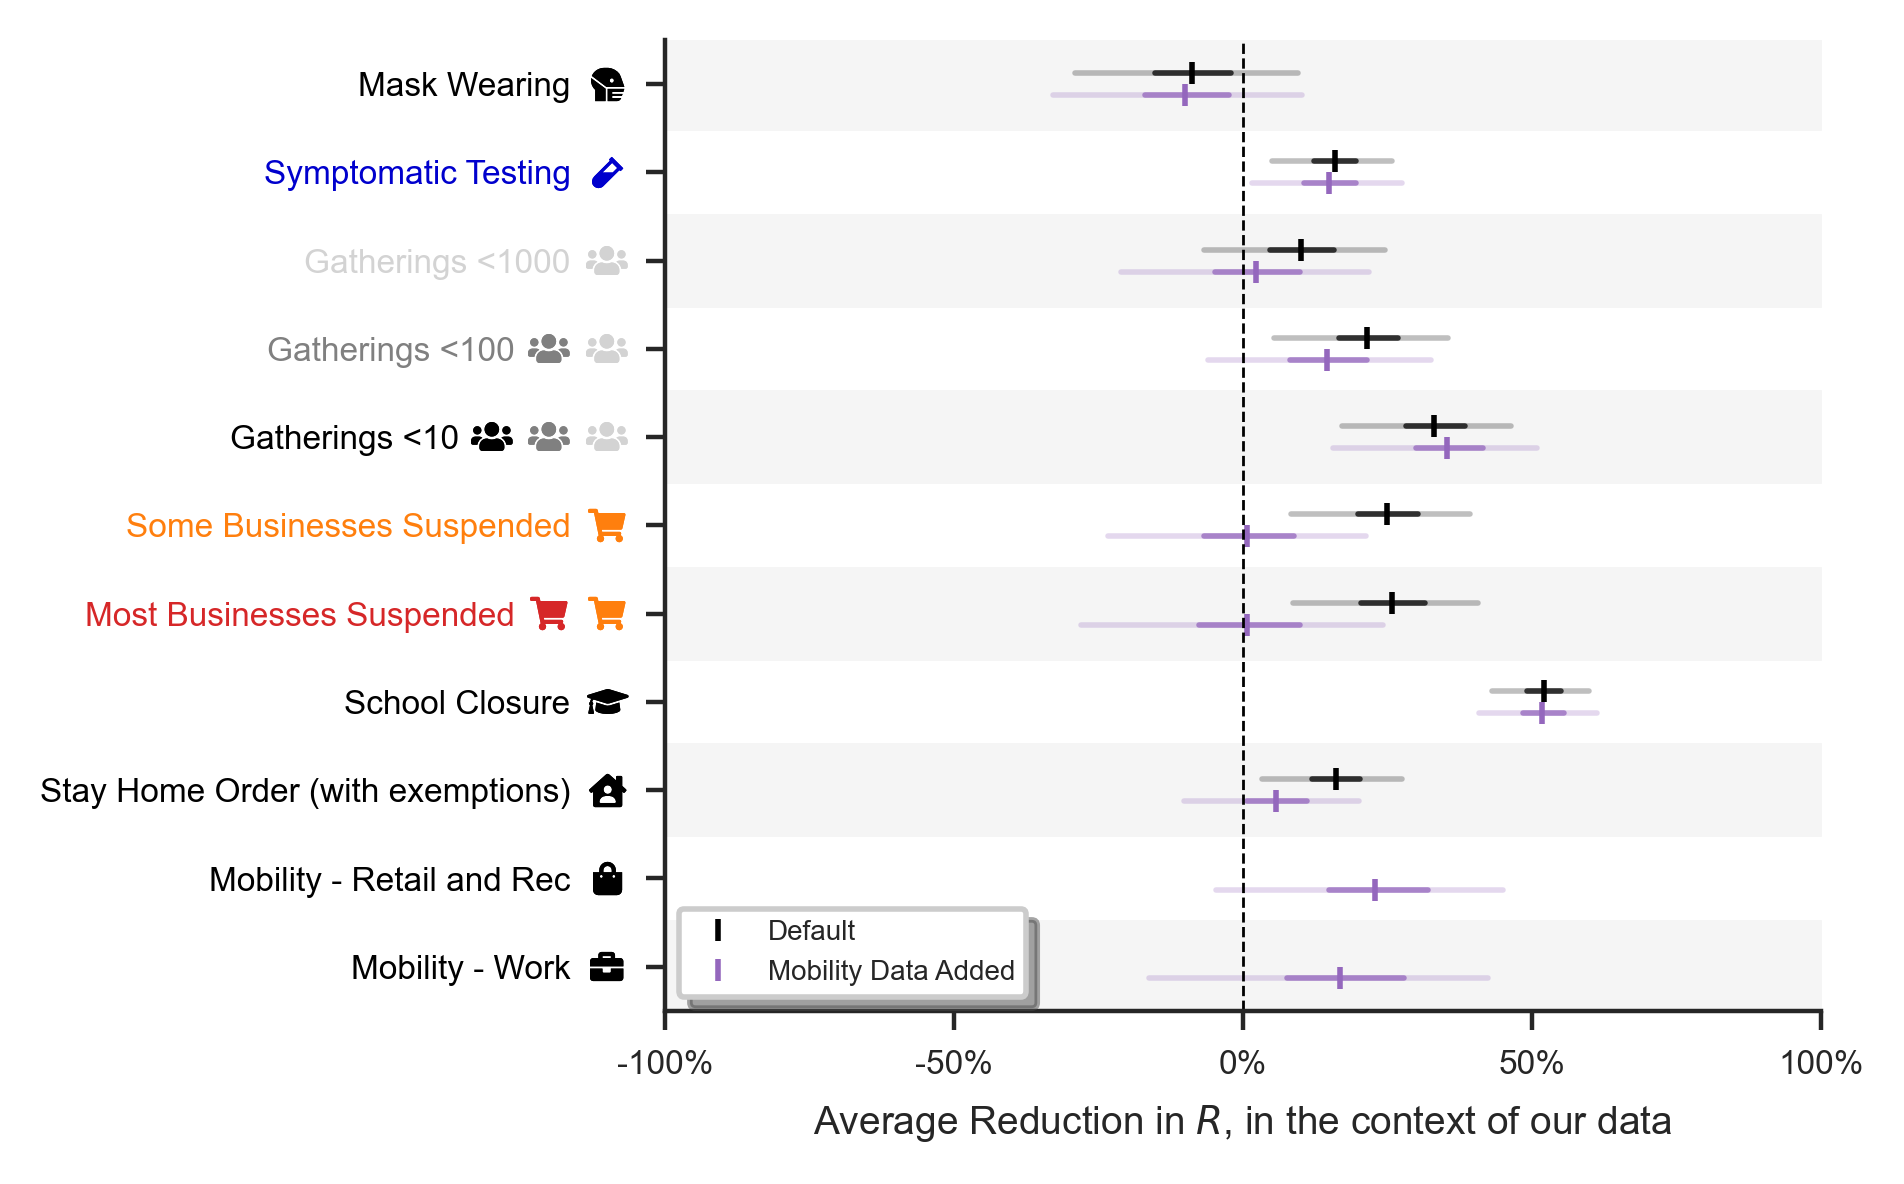

In [234]:
for model_type in model_types:
    colors = color_palette_sensitivity(len(legend_labels), index_default, model_type)
    
    filenames = [out_dir + '/default_' + model_type + '.txt', 
                 out_dir + '/data_mobility_rec_work_' + model_type + '.txt']
    spl.plot_cm_effect_sensitivity_v2(filenames, data_mob.CMs, legend_labels, 
                                   colors=colors, 
                                   legend_fontsize=legend_fontsize)
    
    plt.savefig(out_dir + '/data_mobility_sensitivity_' + model_type + '.pdf')

#### including only retail and rec

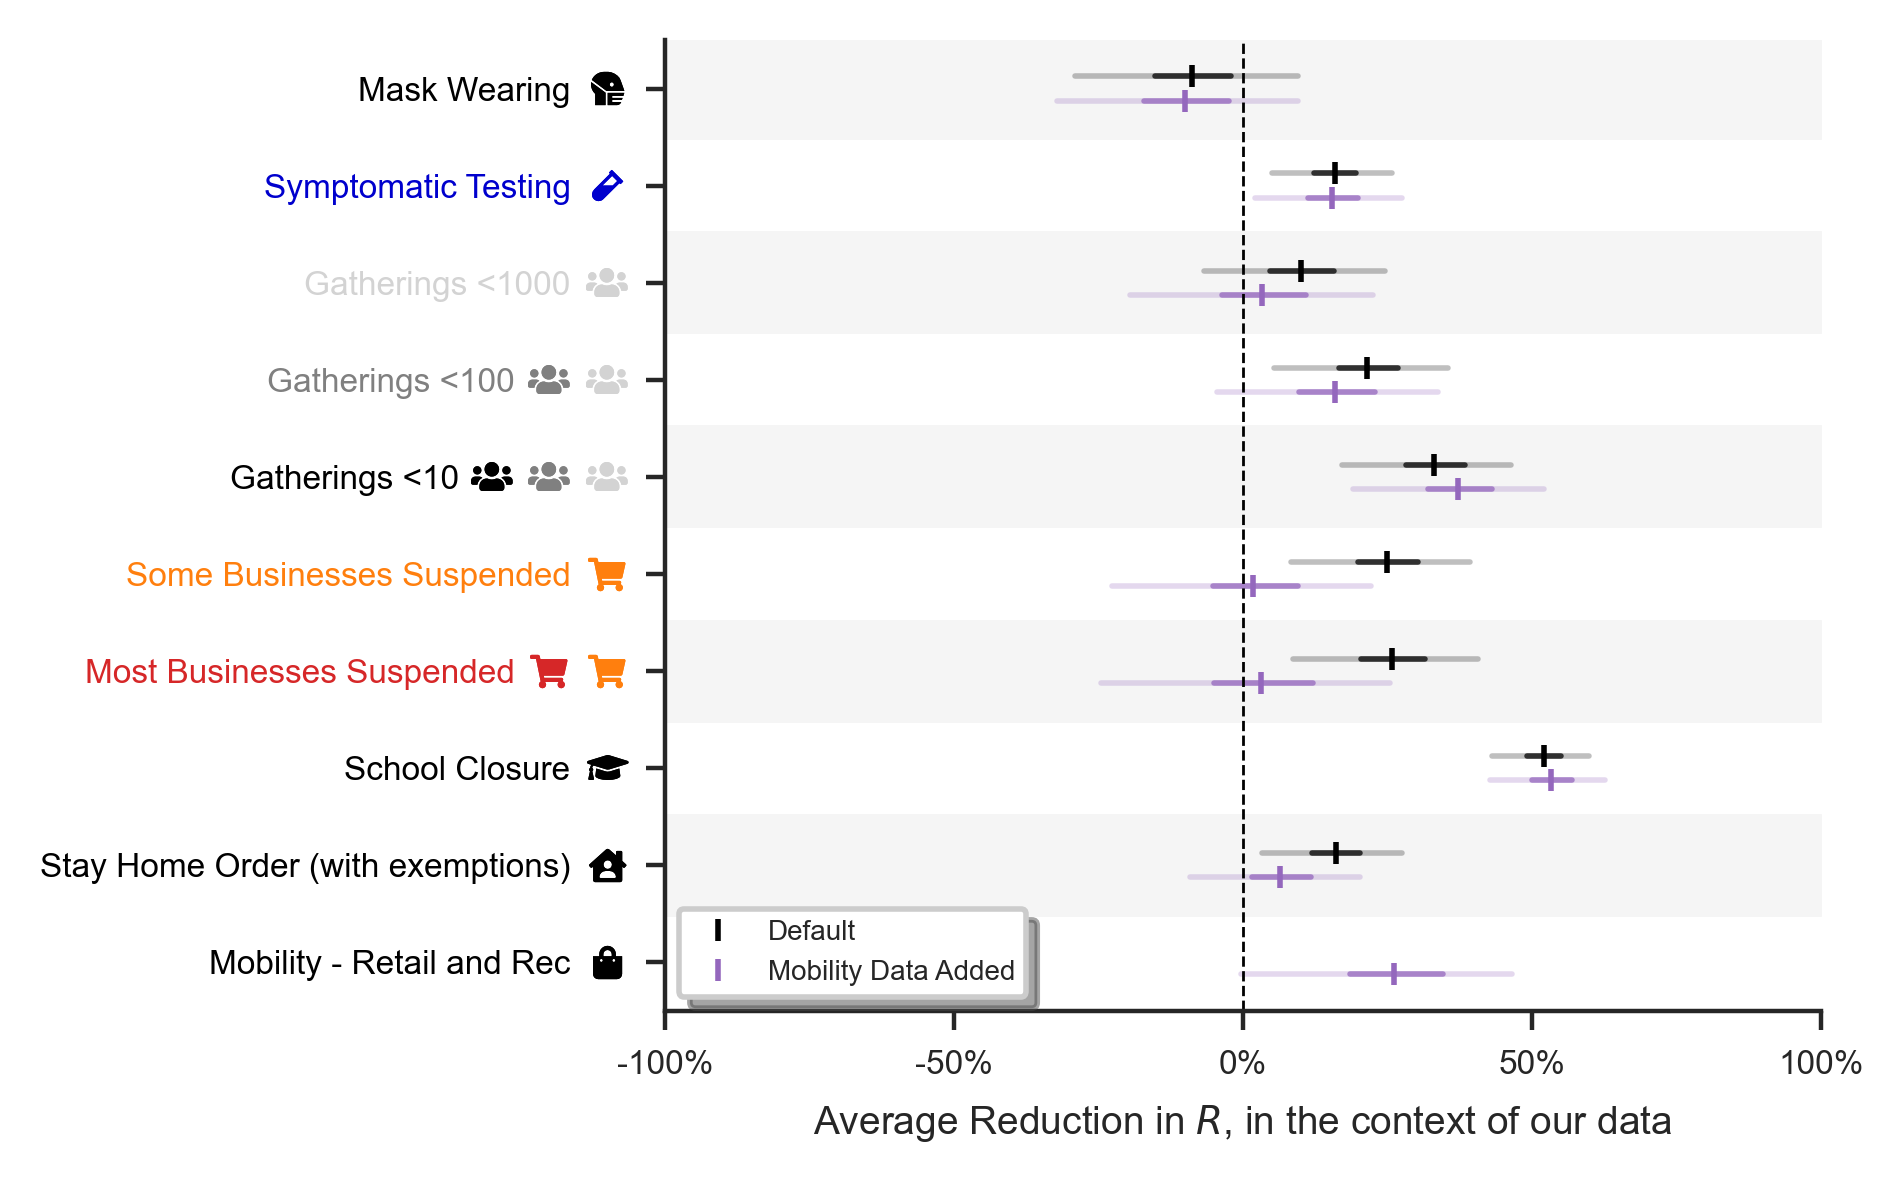

In [235]:
for model_type in model_types:
    colors = color_palette_sensitivity(len(legend_labels), index_default, model_type)
    
    filenames = [out_dir + '/default_' + model_type + '.txt', 
                 out_dir + '/data_mobility_no_work_' + model_type + '.txt']
    spl.plot_cm_effect_sensitivity_v2(filenames, data_mob_no_work.CMs, legend_labels, 
                                   colors=colors, 
                                   legend_fontsize=legend_fontsize)
    
    plt.savefig(out_dir + '/data_mobility_no_work_sensitivity_' + model_type + '.pdf')

## SE Schools open sensitivity

In [236]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("../final_data/data_SE_schools_open.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


In [237]:
cm_labels = data.CMs
legend_labels = ['Default', 'SE Schools Open']
legend_fontsize=6
index_default = 0

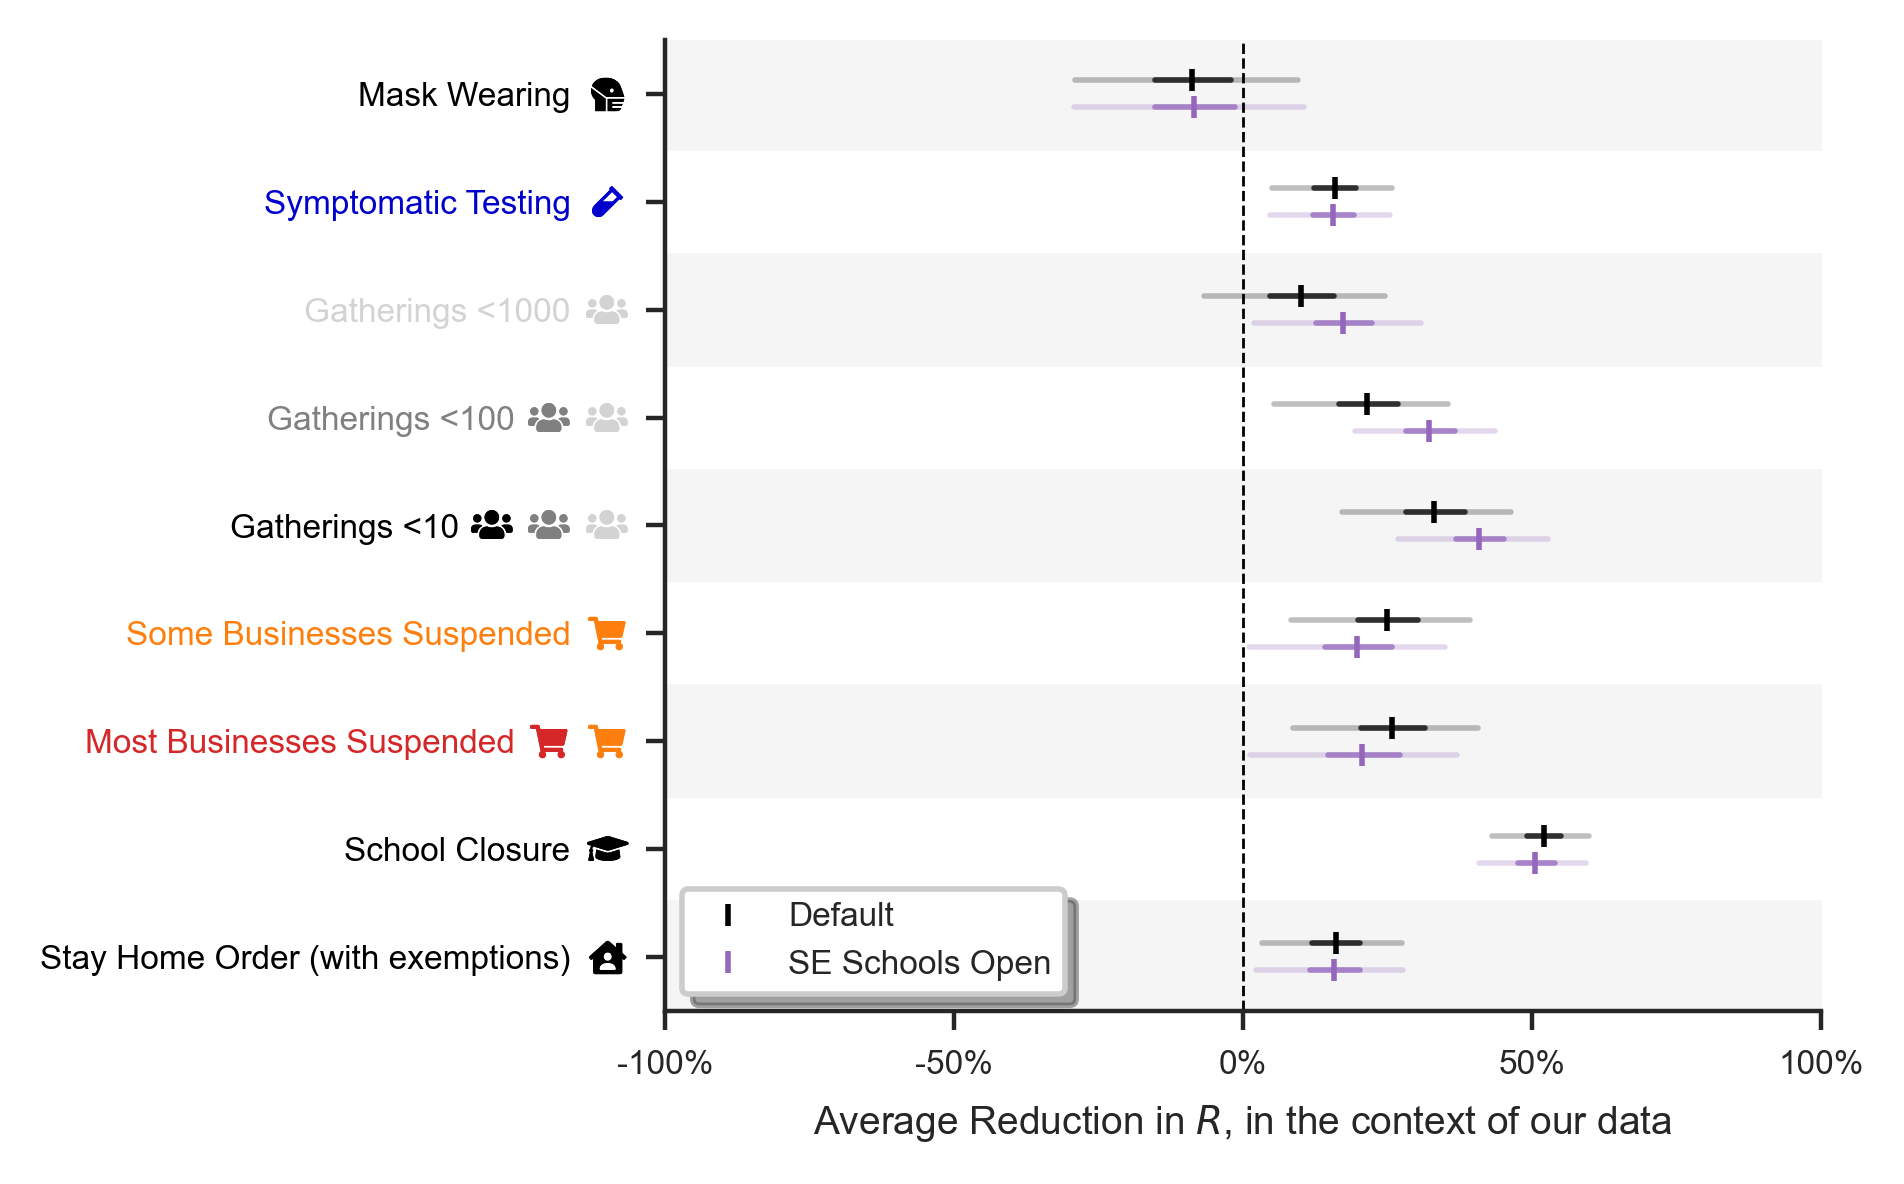

In [238]:
for model_type in model_types:
    colors = color_palette_sensitivity(len(legend_labels), index_default, model_type)
    
    filenames = [out_dir+'/default_'+ model_type + '.txt', out_dir+'/schools_open_'+ model_type + '.txt']
    spl.plot_cm_effect_sensitivity_v2(filenames, cm_labels, legend_labels, 
                                   colors=colors,  
                                   legend_fontsize=legend_fontsize)
    plt.savefig(out_dir+'/schools_open_sensitivity_' + model_type + '.pdf')

## Delay mean sensitivity

In [239]:
mean_shift = [-2, -1, 1, 2]

In [203]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("../final_data/data_final.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


In [83]:
def gamma_mu_cov_to_shape_scale(mu, cov):
    shape = 1/(cov**2)
    scale = mu * (cov**2)
    return shape, scale

def calc_shifted_delay_mean_death(mean_shift):
    nRVs= int(9e7)
    shp1, scl1 = gamma_mu_cov_to_shape_scale(5.1 + mean_shift, 0.86)
    shp2, scl2 = gamma_mu_cov_to_shape_scale(18.8 + mean_shift, 0.45)
    samples = np.random.gamma(shape=shp1, scale=scl1, size=nRVs) + np.random.gamma(shape=shp2, scale=scl2, size=nRVs)
    bins = np.arange(-1, 64.0)
    bins[2:] += 0.5
    #print(f"Binned As {bins}")
    n, _, _ = plt.hist(samples, bins);
    delay_prob = n / np.sum(n)
    #print(f"Expectation: {np.sum([(i) * delay_prob[i] for i in range(64)])}")
    #print(f"True Mean: {np.mean(samples)}")
    #print(f"Delay Prob: {delay_prob}")
    return delay_prob

def calc_shifted_delay_mean_conf(mean_shift):
    m = 5.25 + mean_shift
    r = 1.57
    p = m/(m+r)
    
    nRVs= int(9e7)
    shp1, scl1 = gamma_mu_cov_to_shape_scale(5.1 + mean_shift, 0.86)
    samples = np.random.gamma(shape=shp1, scale=scl1, size=nRVs) + np.random.negative_binomial(r, (1-p), size=nRVs)
    bins = np.arange(-1, 32.0)
    bins[2:] += 0.5
    #print(f"Binned As {bins}")
    n, _, _ = plt.hist(samples, bins);
    delay_prob = n / np.sum(n)
    #print(f"Expectation: {np.sum([(i) * delay_prob[i] for i in range(64)])}")
    #print(f"True Mean: {np.mean(samples)}")
    #print(f"Delay Prob: {delay_prob}")
    return delay_prob

In [84]:
def vary_delay_mean(model, mean_shift, model_type):
    '''to use for deaths model or active cases model'''
    default_mean = np.trapz(model.DelayProb*(np.arange(len(model.DelayProb))))
    print('Default mean: '+ str(default_mean))
    if (mean_shift+default_mean)==default_mean:
        pass
    else:
        if model_type == 'active':
            delay_prob = calc_shifted_delay_mean_conf(mean_shift)
        if model_type == 'death': 
            delay_prob = calc_shifted_delay_mean_death(mean_shift)
        model.DelayProb = delay_prob
    return model
    
def vary_delay_mean_confirmed(model, mean_shift):
    '''to use for combined model'''
    default_mean = np.trapz(model.DelayProbCases[0]*(np.arange(len(model.DelayProbCases[0]))))
    print('Default mean conf: '+ str(default_mean))
    if (mean_shift+default_mean)==default_mean:
        pass
    else:
        delay_prob = calc_shifted_delay_mean_conf(mean_shift)
        model.DelayProbCases = delay_prob
    return model

def vary_delay_mean_death(model, mean_shift):
    '''to use for combined model'''
    default_mean = np.trapz(model.DelayProbDeaths[0]*(np.arange(len(model.DelayProbDeaths[0]))))
    print('Default mean death: '+ str(default_mean))
    if (mean_shift+default_mean)==default_mean:
        pass
    else:
        delay_prob = calc_shifted_delay_mean_death(mean_shift)
        model.DelayProbDeaths = delay_prob
    return model

Delay Mean Shift: -2
Model: combined
Default mean conf: 10.102311679999998
Default mean death: 23.84020679695945
Delay Mean Shift: -1
Model: combined
Default mean conf: 10.102311679999998
Default mean death: 23.84020679695945
Delay Mean Shift: 1
Model: combined
Default mean conf: 10.102311679999998
Default mean death: 23.84020679695945
Delay Mean Shift: 2
Model: combined
Default mean conf: 10.102311679999998
Default mean death: 23.84020679695945
Delay Mean Shift: -2
Model: active
Default mean: 10.102311679999998
Delay Mean Shift: -1
Model: active
Default mean: 10.102311679999998
Delay Mean Shift: 1
Model: active
Default mean: 10.102311679999998
Delay Mean Shift: 2
Model: active
Default mean: 10.102311679999998
Delay Mean Shift: -2
Model: death
Default mean: 23.84020679695945
Delay Mean Shift: -1
Model: death
Default mean: 23.84020679695945
Delay Mean Shift: 1
Model: death
Default mean: 23.84020679695945
Delay Mean Shift: 2
Model: death
Default mean: 23.84020679695945


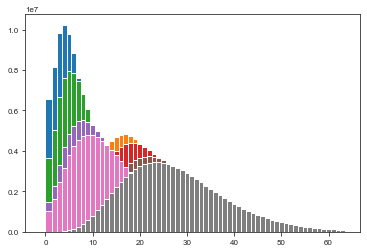

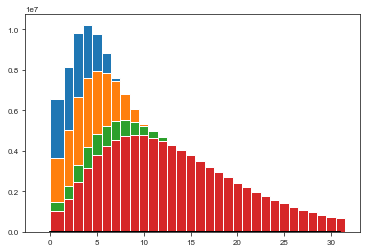

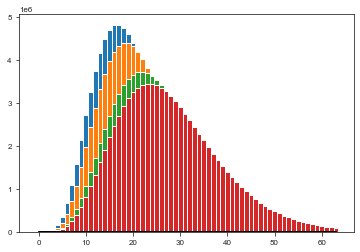

In [86]:
delay_probs_conf_combined = []
delay_probs_death_combined = []
delay_probs_death = []
delay_probs_active = []

for model_type in model_types:
    plt.figure()
    if model_type=='combined':
        # for combined model vary confirmed and deaths delay
        for i in range(len(mean_shift)):
            print('Delay Mean Shift: ' + str(mean_shift[i]))
            print('Model: ' + str(model_type))
            with cm_effect.models.CMCombined_Final(data) as model:
                model = vary_delay_mean_confirmed(model, mean_shift[i])
                delay_probs_conf_combined.append(model.DelayProbCases) 
                model.build_model()

            with cm_effect.models.CMCombined_Final(data) as model:
                model = vary_delay_mean_death(model, mean_shift[i])
                delay_probs_death_combined.append(model.DelayProbDeaths) 
                model.build_model()
    elif model_type=='combined_v3':
        # for combined model vary confirmed and deaths delay
        for i in range(len(mean_shift)):
            print('Delay Mean Shift: ' + str(mean_shift[i]))
            print('Model: ' + str(model_type))
            with cm_effect.models.CMCombined_Final_V3(data) as model:
                model = vary_delay_mean_confirmed(model, mean_shift[i])
                #delay_probs_conf_combined.append(model.DelayProbCases) 
                model.build_model()

            with cm_effect.models.CMCombined_Final_V3(data) as model:
                model = vary_delay_mean_death(model, mean_shift[i])
                #delay_probs_death_combined.append(model.DelayProbDeaths) 
                model.build_model()
    else:
        # for other models there is only one delay mean
        for i in range(len(mean_shift)):
            print('Delay Mean Shift: ' + str(mean_shift[i]))
            print('Model: ' + str(model_type))
            if model_type=='active':
                with cm_effect.models.CMActive_Final(data) as model:
                    plt.plot(model.DelayProb, color='k', label='default')
                    model = vary_delay_mean(model, mean_shift[i], model_type)
                    delay_probs_active.append(model.DelayProb) 
                    model.build_model()
            if model_type=='death':
                with cm_effect.models.CMDeath_Final(data) as model:
                    plt.plot(model.DelayProb, color='k', label='default')
                    model = vary_delay_mean(model, mean_shift[i], model_type)
                    delay_probs_death.append(model.DelayProb) 
                    model.build_model()

combined
6.353502822874145
8.29612605317028
11.690805141264276
13.034007853516469
active
6.354092323594275
8.295711284520253
11.691383711928381
13.033222626794203
death
19.894386303943964
21.87904047222451
25.757535422682846
27.602945368585868


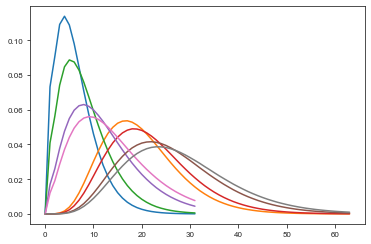

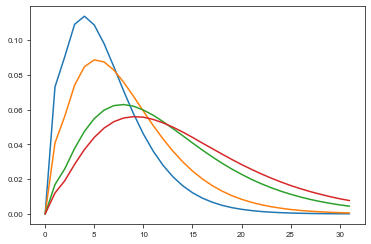

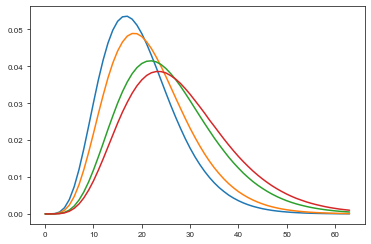

In [87]:
delay_means_conf_combined = []
delay_means_death_combined = [] 
delay_means_active = []
delay_means_death = []
for model_type in model_types:
    plt.figure()
    print(model_type)
    for i in range(len(mean_shift)):
        if model_type == 'combined':
            shifted_mean_conf = np.trapz(delay_probs_conf_combined[i]*(np.arange(len(delay_probs_conf_combined[i]))))
            delay_means_conf_combined.append(shifted_mean_conf)
            shifted_mean_death = np.trapz(delay_probs_death_combined[i]*(np.arange(len(delay_probs_death_combined[i]))))
            delay_means_death_combined.append(shifted_mean_death)
            print(shifted_mean_conf)
            plt.plot(delay_probs_conf_combined[i], label = shifted_mean_conf)
            plt.plot(delay_probs_death_combined[i], label = shifted_mean_death)
        if model_type == 'active':
            shifted_mean = np.trapz(delay_probs_active[i]*(np.arange(len(delay_probs_active[i]))))
            print(shifted_mean)
            delay_means_active.append(shifted_mean)
            plt.plot(delay_probs_active[i], label=shifted_mean)
        if model_type == 'death':
            shifted_mean = np.trapz(delay_probs_death[i]*(np.arange(len(delay_probs_death[i]))))
            print(shifted_mean)
            delay_means_death.append(shifted_mean)
            plt.plot(delay_probs_death[i], label=shifted_mean)

In [242]:
index_default=2
cm_labels = data.CMs
legend_fontsize=6

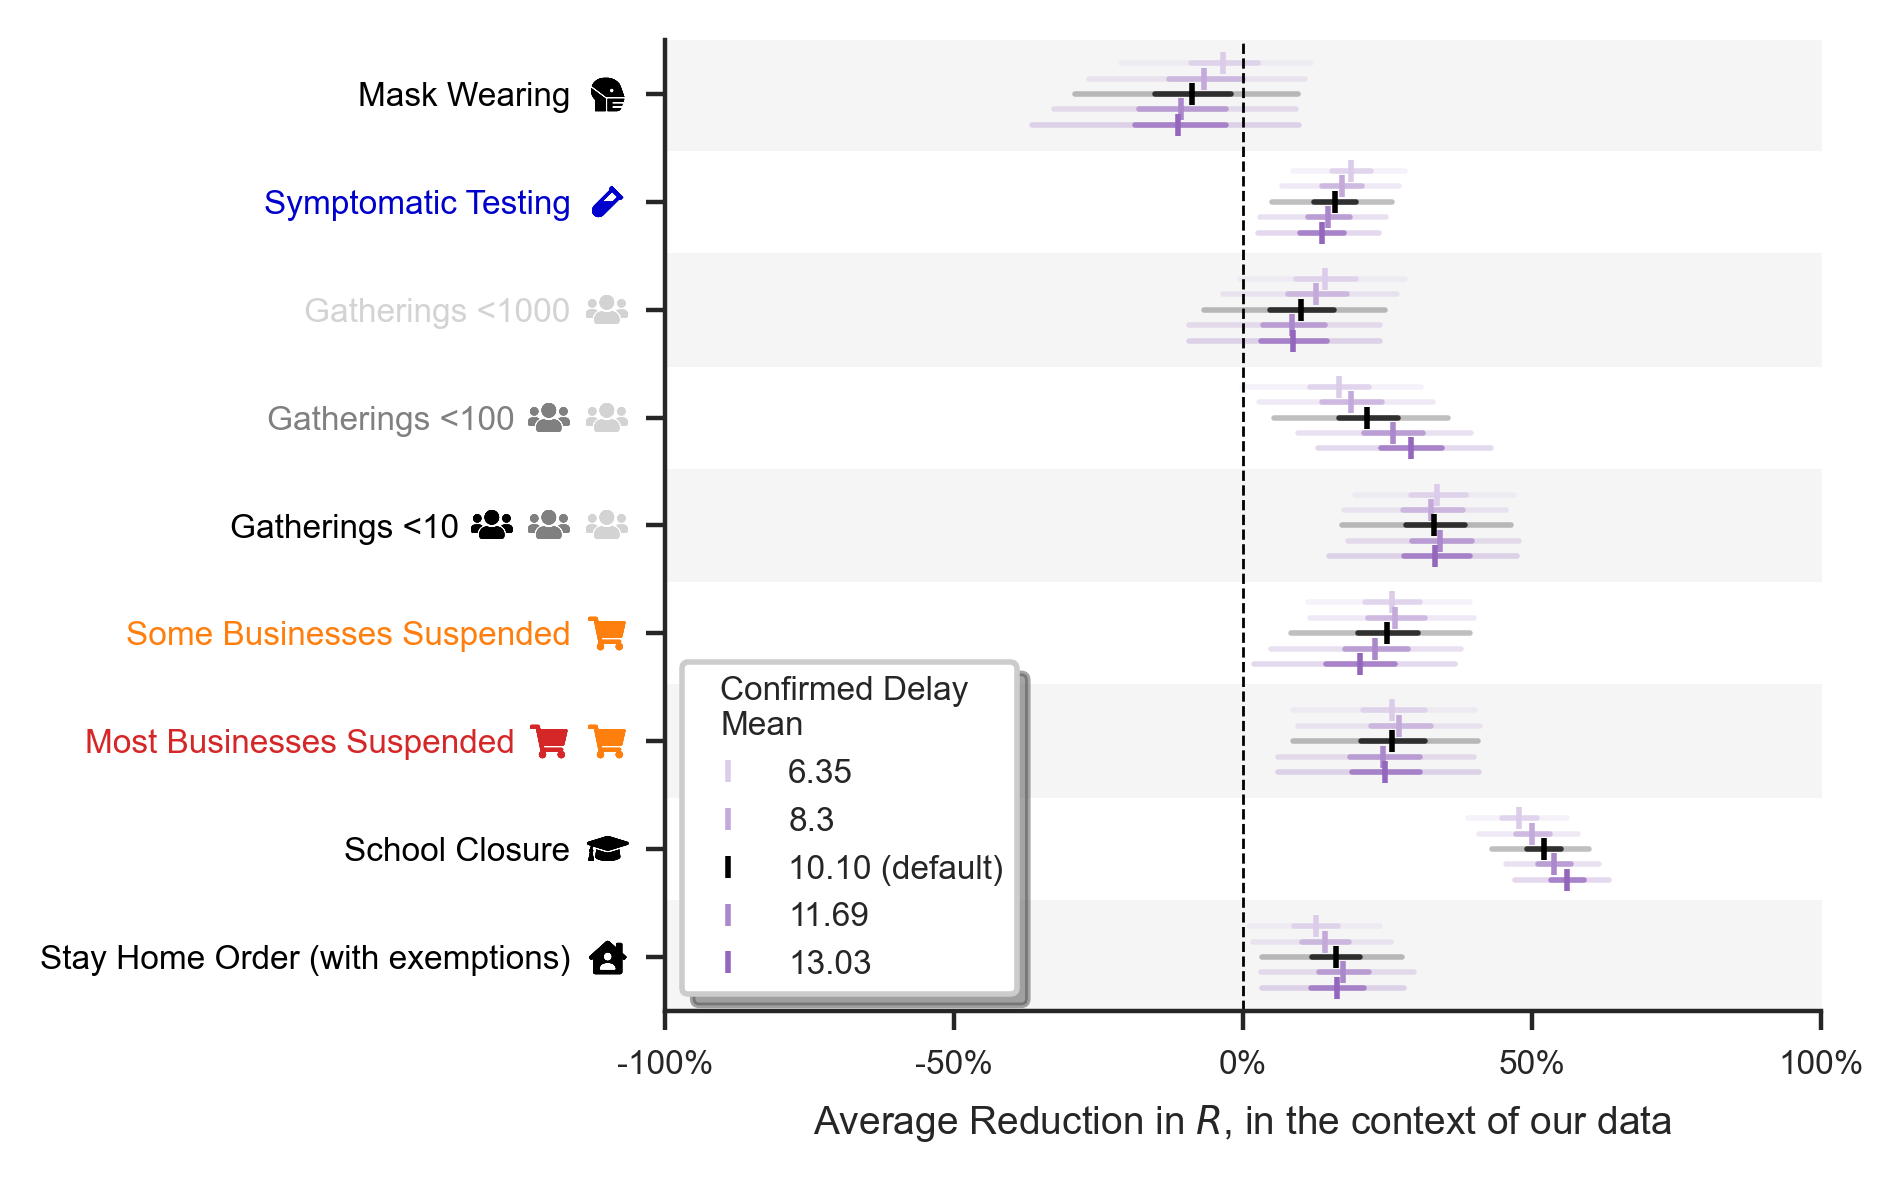

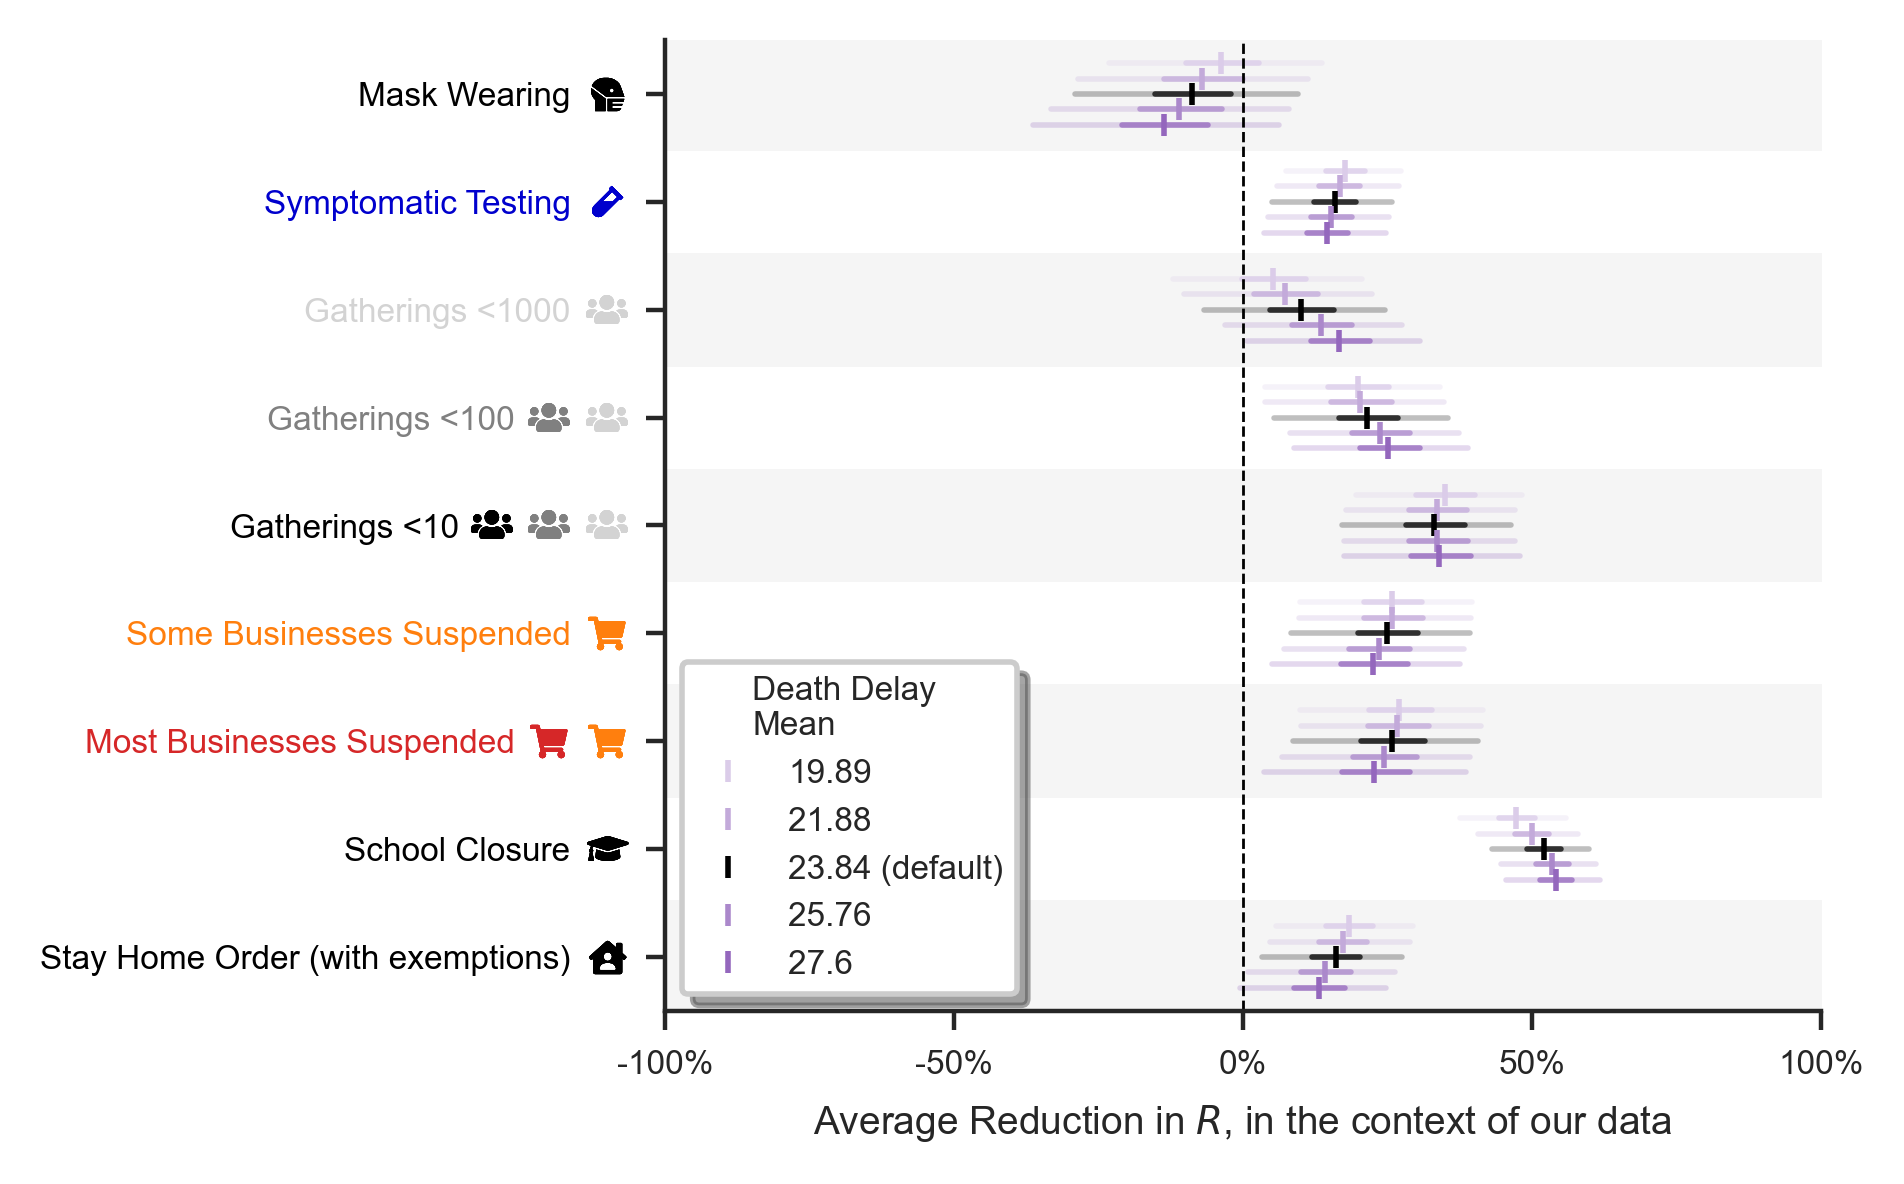

In [243]:
for model_type in model_types:
    colors = color_palette_sensitivity(len(legend_labels), index_default, model_type)
    
    if model_type=='combined' or model_type=='combined_v3':
        filenames = [f'%s/delay_mean_confirmed_%s_{i}.txt'%(out_dir,model_type) for i in range(len(mean_shift))]
        filenames.insert(index_default, out_dir+'/default_'+ model_type + '.txt')
        legend_labels = copy.deepcopy(delay_means_conf_combined)
        for i in range(len(legend_labels)):
            legend_labels[i]=round(legend_labels[i],2)
        legend_labels.insert(index_default,'10.10 (default)')
        spl.plot_cm_effect_sensitivity_v2(filenames, cm_labels, legend_labels, 
                                       colors=colors, 
                                       legend_fontsize=legend_fontsize,
                                       legend_title='Confirmed Delay \nMean')
        plt.savefig(out_dir + '/delay_mean_sensitivity_confirmed_' + model_type + '.pdf')
        
    
        filenames = [f'%s/delay_mean_death_%s_{i}.txt'%(out_dir,model_type) for i in range(len(mean_shift))]
        filenames.insert(index_default, out_dir+'/default_'+ model_type + '.txt')
        legend_labels = copy.deepcopy(delay_means_death_combined)
        for i in range(len(legend_labels)):
            legend_labels[i]=round(legend_labels[i],2)
        legend_labels.insert(index_default,'23.84 (default)')
        spl.plot_cm_effect_sensitivity_v2(filenames, cm_labels, legend_labels, 
                                       colors=colors,
                                       legend_fontsize=legend_fontsize,
                                       legend_title='Death Delay \nMean')
        
        plt.savefig(out_dir + '/delay_mean_sensitivity_death_' + model_type + '.pdf')
    else:

        filenames = [f'%s/delay_mean_%s_{i}.txt'%(out_dir,model_type) for i in range(len(mean_shift))]
        filenames.insert(index_default, out_dir + '/default_'+ model_type + '.txt')

        legend_labels = copy.deepcopy(delay_means_active)
        for i in range(len(legend_labels)):
            legend_labels[i]=round(legend_labels[i],2)
        if model_type=='death':
            legend_labels.insert(index_default,'10.1 (default)')
            legend_title = 'Death Delay \nMean'
        if model_type=='active':
            legend_labels.insert(index_default,'23.84 (default)')
            legend_title = 'Confirmed Delay \nMean'

        spl.plot_cm_effect_sensitivity_v2(filenames, cm_labels, legend_labels, 
                                       colors=colors, 
                                       legend_fontsize=legend_fontsize,
                                       legend_title='Confirmed Delay \nMean')
        plt.savefig(out_dir + '/delay_mean_sensitivity_' + model_type + '.pdf')

## MCMC Stability

In [244]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("../final_data/data_final.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


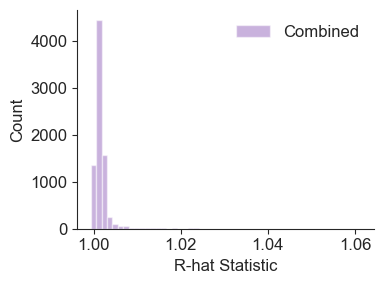

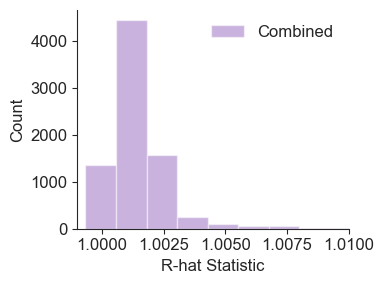

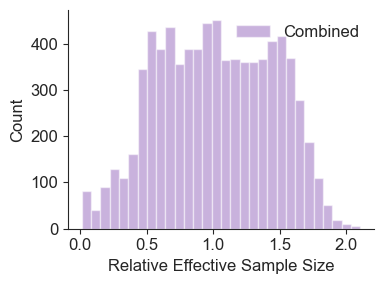

In [278]:
rhats_list = []
ess_list = []
labels = []
colors = []
for model_type in model_types:
    rhats= np.loadtxt(out_dir + '/rhats_' + model_type +'.txt')
    ess= np.loadtxt(out_dir + '/ess_' + model_type +'.txt')
    rhats_list.append(rhats)
    ess_list.append(ess)
    if model_type=='combined' or model_type =='combined_v3':
        labels.append('Combined')
        colors.append('tab:purple')
    if model_type=='active':
        labels.append('Cases')
        colors.append('tab:blue')
    if model_type=='death':
        labels.append('Cases')
        colors.append('tab:red')

spl.plot_histogram_model_stat(rhats_list, labels, colors)
plt.xlabel('R-hat Statistic')
plt.tight_layout()
plt.savefig(out_dir +'/rhat_dist_all.pdf')

spl.plot_histogram_model_stat(rhats_list, labels, colors)
plt.xlabel('R-hat Statistic')
plt.xlim([0.999, 1.01])
plt.tight_layout()
plt.savefig(out_dir +'/rhat_dist_all_zoom.pdf')

spl.plot_histogram_model_stat(ess_list, labels, colors)
plt.xlabel('Relative Effective Sample Size')
plt.tight_layout()
plt.savefig(out_dir +'/ess_dist_all.pdf')

## Minimum Number Confirmed Cases

In [246]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("../final_data/data_final.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


In [247]:
min_conf_cases = [10, 30, 300, 500]
legend_title = 'Min Confirmed Cases'
legend_labels = copy.deepcopy(min_conf_cases)
index_default= 2
legend_labels.insert(index_default, '100 (default)')
cm_labels = data.CMs 
legend_fontsize=6

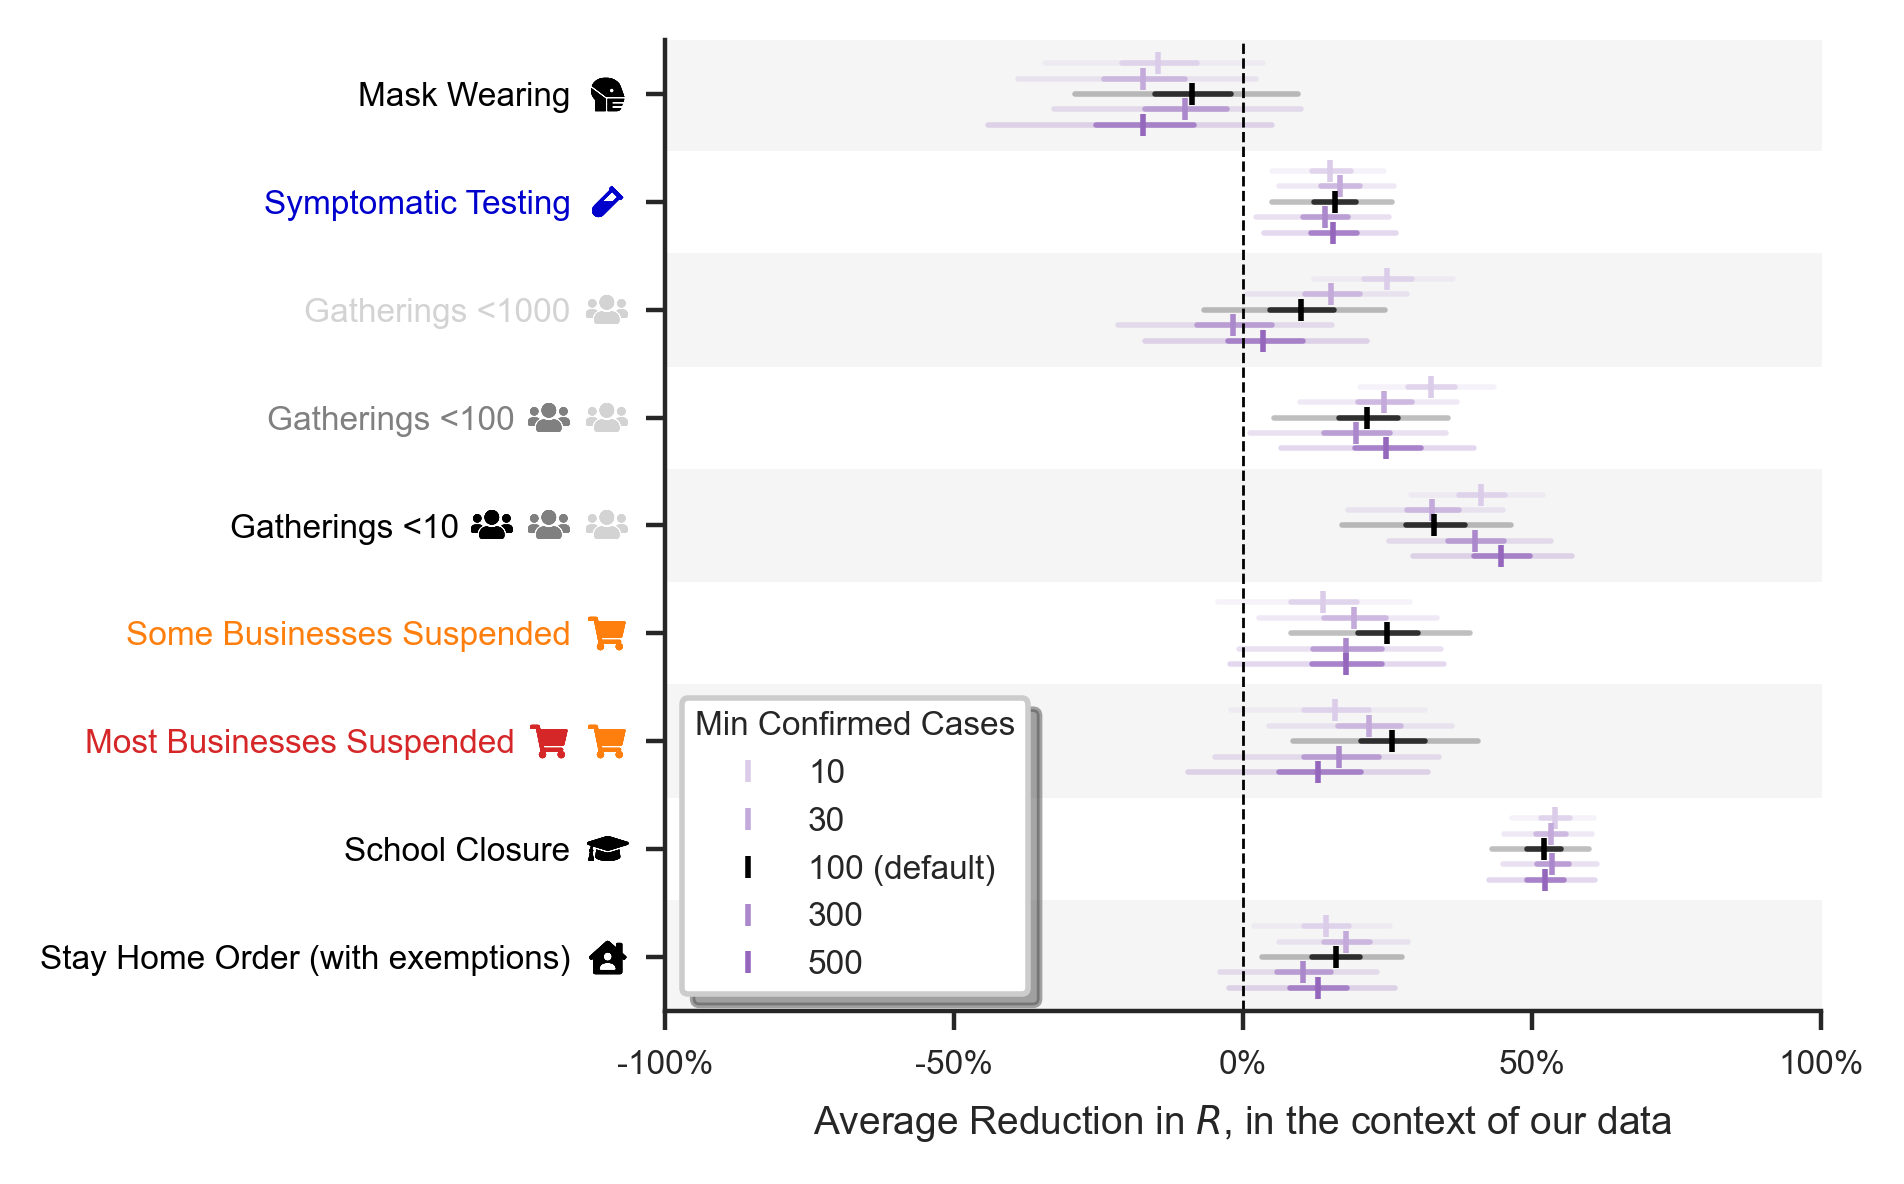

In [248]:
for model_type in model_types:
    colors = color_palette_sensitivity(len(legend_labels), index_default, model_type)
    
    filenames = [f'%s/min_confirmed_%s_{mc}.txt'%(out_dir, model_type) for mc in min_conf_cases]
    filenames.insert(index_default, out_dir + '/default_' + model_type + '.txt')

    spl.plot_cm_effect_sensitivity_v2(filenames, cm_labels, legend_labels,
                                   legend_title=legend_title,
                                   legend_fontsize=legend_fontsize,
                                   colors = colors)
    plt.savefig(out_dir + '/min_confirmed_sensitivity_' + model_type + '.pdf')

## R Hyperprior mean sensitivity

In [249]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("../final_data/data_final.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


In [250]:
hyperprior_means = [1.5, 5.5] # 3.25 is the default value
cm_labels = data.CMs
legend_labels = copy.deepcopy(hyperprior_means)
index_default=1
legend_labels.insert(index_default, '3.25 (default)')
legend_title = 'R Hyperprior Mean'
legend_fontsize=6

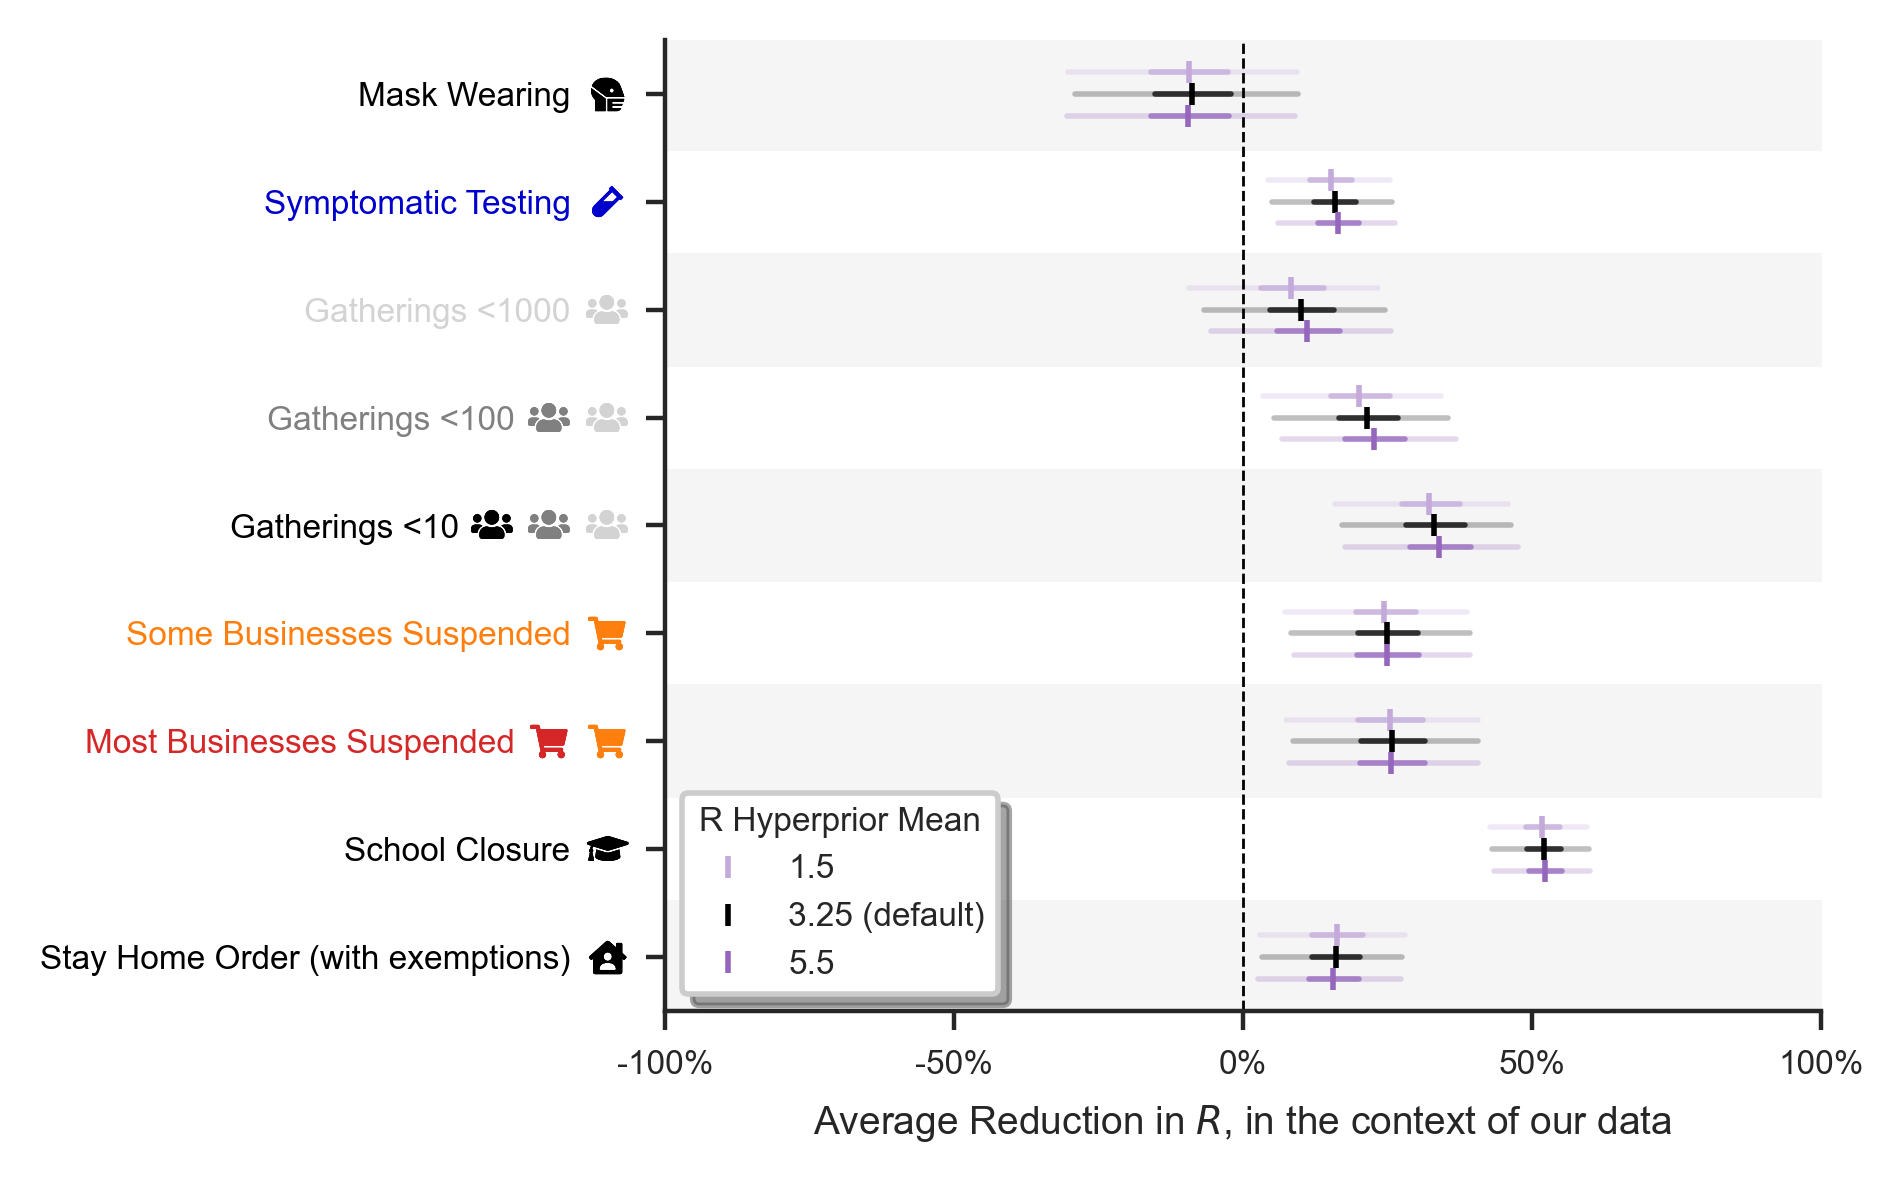

In [251]:
for model_type in model_types:
    colors = color_palette_sensitivity(len(legend_labels), index_default, model_type)

    filenames = [f'%s/R_hyperprior_%s_{i}.txt'%(out_dir,model_type) for i in range(len(hyperprior_means))]
    filenames.insert(index_default, out_dir + '/default_' + model_type + '.txt')
    spl.plot_cm_effect_sensitivity_v2(filenames, cm_labels, legend_labels, 
                                   colors=colors, 
                                   legend_title=legend_title, 
                                   legend_fontsize=legend_fontsize)
    plt.savefig(out_dir + '/R_hyperprior_sensitivity_' + model_type + '.pdf')

## Serial interval distribution sensitivity

In [252]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("../final_data/data_final.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


In [253]:
serial_interval = [4, 5, 6, 7, 8] # 5.1 or 6.67 is the default value
cm_labels = data.CMs
legend_labels = copy.deepcopy(serial_interval)
index_default=3
legend_labels.insert(index_default, '6.67 (default)')
legend_title = 'Serial Interval Mean'
legend_fontsize=6

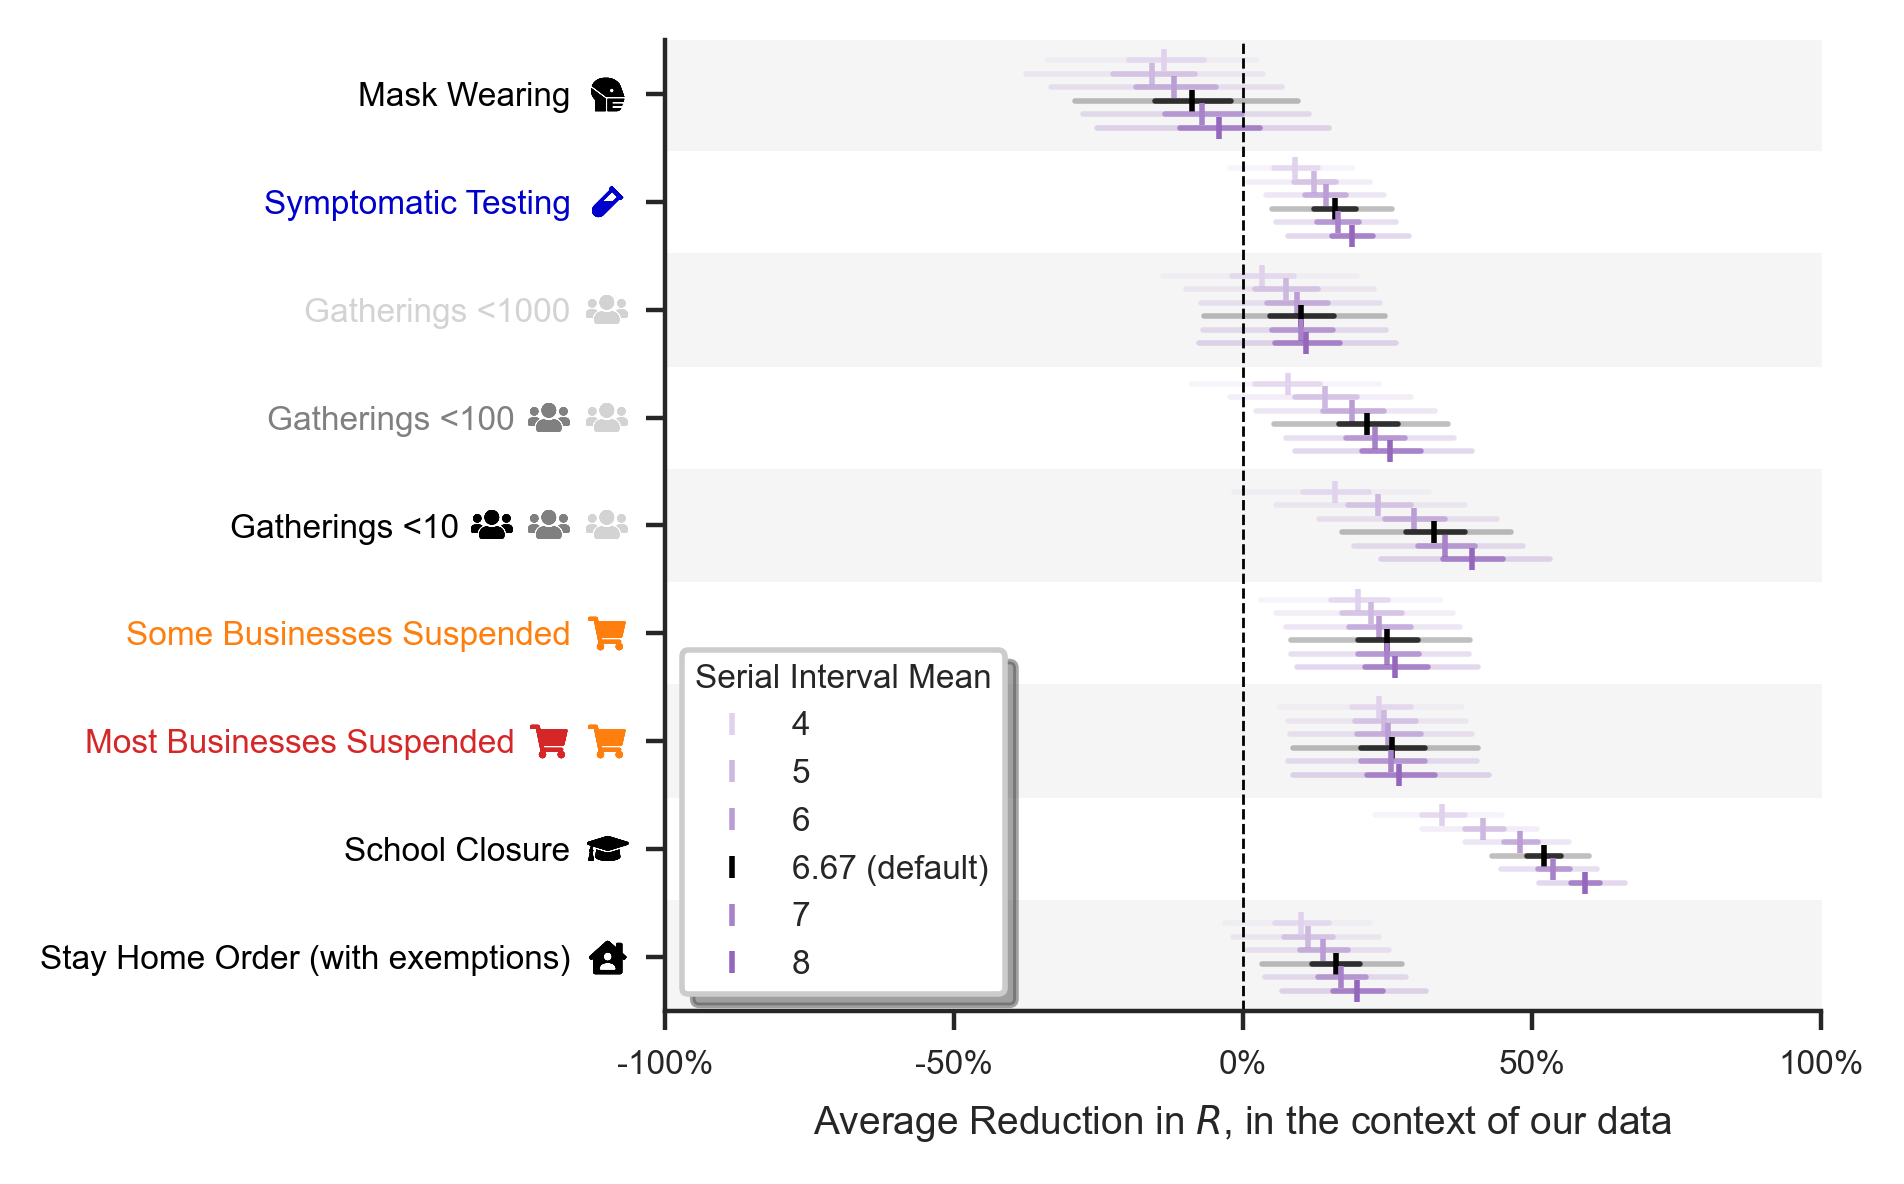

In [254]:
for model_type in model_types:
    colors = color_palette_sensitivity(len(legend_labels), index_default, model_type)

    filenames = [f'%s/serial_int_%s_SI{si}.txt'%(out_dir,model_type) for si in serial_interval]
    filenames.insert(index_default, out_dir + '/default_' + model_type + '.txt')
    spl.plot_cm_effect_sensitivity_v2(filenames, cm_labels, legend_labels, 
                                   colors=colors, 
                                   legend_title=legend_title, 
                                   legend_fontsize=legend_fontsize)
    plt.savefig(out_dir + '/serial_int_sensitivity_' + model_type + '.pdf')